## Exploring Insights in Hotel Reservations: Machine Learning on Hotel Booking Demand Datasets

#### Authors:
1. Angela Hartono

2. Felicia Andrea Tandoko

3. Sharon Selina Yoe

## ABOUT THE DATASET

The hotel booking demand dataset compiles information from two operations, a resort hotel and a city hotel, both situated in Portugal. This dataset provides detailed insights into customer booking behavior, hotel occupancy trends, and operational aspects. Understanding customer segments is crucial for enhancing revenue management, customer satisfaction, and operational efficiency for both hotels. This dataset offers a granular view of customer booking behavior, hotel occupancy trends, and operational aspects of hotel management.

Key aspects in the dataset include:

- Booking Details: Encompasses a wide range of data points such as booking time frames (lead times), length of stay, number of guests (adults, children, and infants), room type selected, and special requests.

- Customer Profiles: The dataset contains demographic and behavioral information about guests, including the type of customer (transient, group, etc.), country of origin, and whether they are repeat visitors.

- Financial Transactions: Details on room rates, deposits, and other charges are included.

- Booking Channels: Information about how bookings were made, whether directly with the hotel, through travel agents, or online platforms.

- Cancellation Patterns: The dataset also includes data on booking cancellations and modifications, which are vital for understanding the volatility of bookings and for devising effective cancellation policies.

The primary goal of analyzing this dataset is to uncover patterns, understand customer segments, and optimize hotel operations. We'll identify customer groups with similar characteristics. This clustering analysis aims to enhance revenue management, customer satisfaction, and operational efficiency using the dataset.

## IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## DATA READING AND UNDERSTANDING

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.shape

(119390, 32)

The dataset consists of 119,390 rows and 32 columns.

In [6]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are two types of data in this dataset: numerical and categorical. Additionally, there are missing values in the 'children', 'country', 'agent', and 'company' columns.

To simplify the analysis, a new column, 'arrival_date,' will be added to display the date of arrival of the customer, derived from the 'arrival_date_year', 'arrival_date_month', and 'arrival_date_day_of_month.'

In [8]:
import datetime
df["arrival_date_month"]=pd.to_datetime(df['arrival_date_month'],format='%B').dt.month
df["arrival_date"]=pd.to_datetime({"year":df["arrival_date_year"].values,
                                   "month":df["arrival_date_month"].values,
                                   "day":df["arrival_date_day_of_month"].values})

Then we convert the 'arrival_date' data type to string. Previously, it was of datetime type.

In [9]:
df['arrival_date'] = df['arrival_date'].astype(str)

Since we already have the 'arrival_date' column, the 'arrival_date_year,' 'arrival_date_day_of_month,' and 'arrival_date_month' columns will be removed.

In [10]:
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis = 1)

Ensure that the 'arrival_date' column has been added, and all of the data types are correct.

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [13]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_week_number            53
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type                        4
adr                               8879
required_car_parking_spac

## DATA VISUALIZATION

#### NUMERICAL DATA

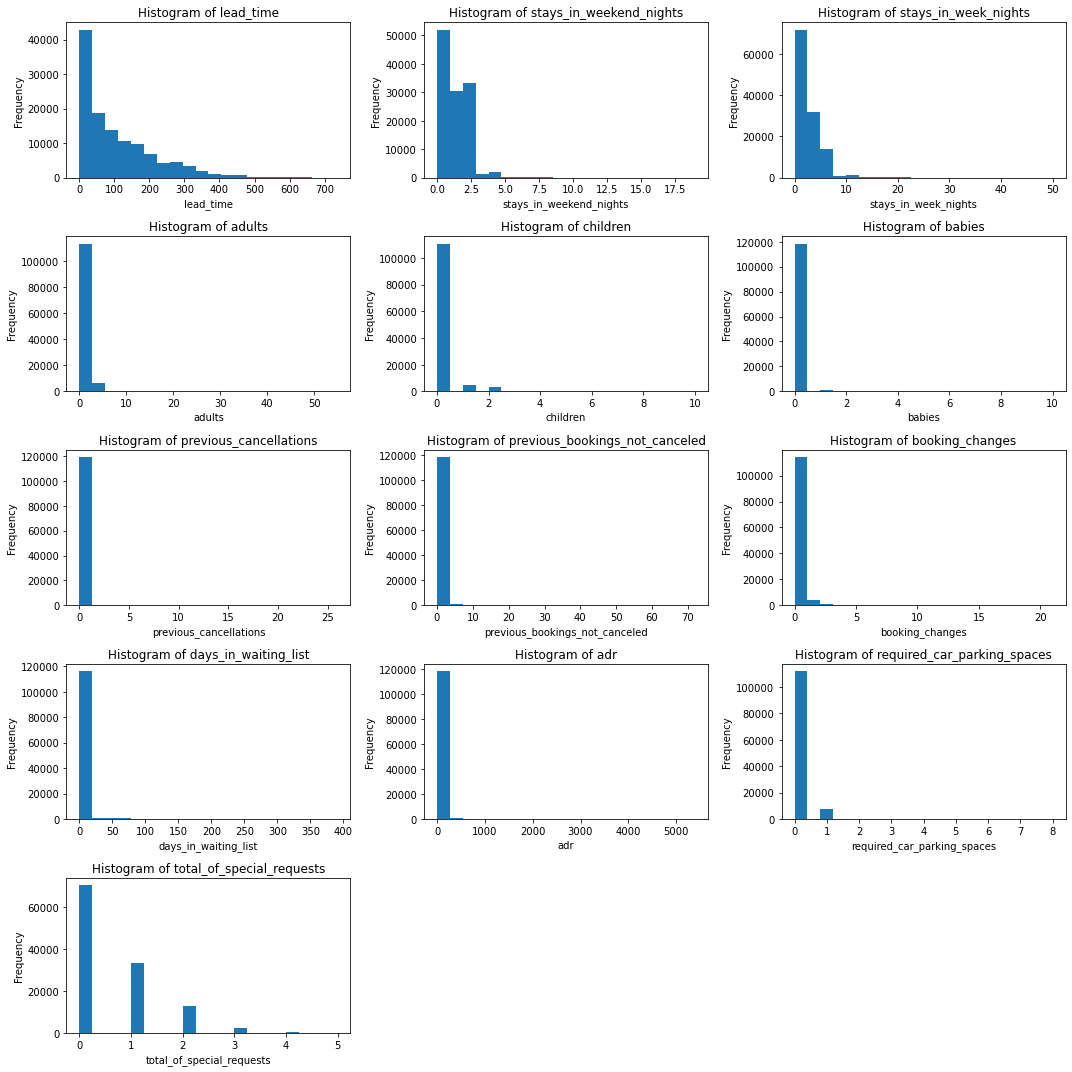

In [17]:
numerical_variables = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                       'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                       'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                       'total_of_special_requests']

num_cols = 3
num_rows = (len(numerical_variables) + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, variable in enumerate(numerical_variables):
    row = i // num_cols
    col = i % num_cols
    axs[row][col].hist(df[variable], bins=20)
    axs[row][col].set_xlabel(variable)
    axs[row][col].set_ylabel('Frequency')
    axs[row][col].set_title(f'Histogram of {variable}')

for i in range(len(numerical_variables), num_cols * num_rows):
    axs[i // num_cols][i % num_cols].axis('off')

plt.tight_layout()
plt.show()

The histograms indicate an imbalance, suggesting the presence of outliers. However, for this case, we won't handle them since the presence of these outliers may carry valuable information or insights for our analysis.

#### CATEGORICAL DATA

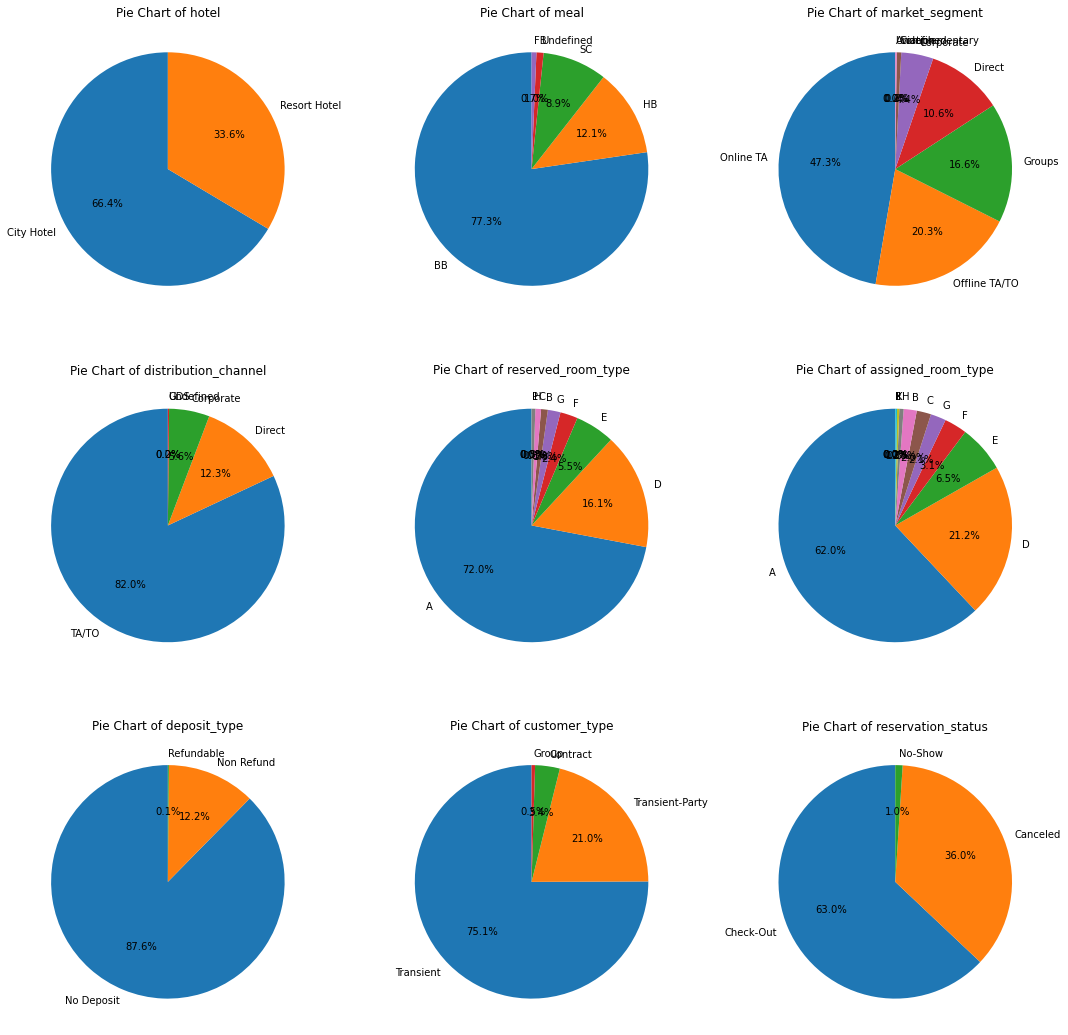

In [18]:
categorical_variables = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
                         'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, variable in enumerate(categorical_variables):
    counts = df[variable].value_counts()
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Pie Chart of {variable}')
    
plt.tight_layout()
plt.show()

## HANDLING MISSING VALUE

The next step is handling missing values. Handling missing values is essential to maintain data integrity, ensure accurate analyses and model performance, and avoid biases in results.

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

The dataset has missing values in four columns:

1. 'children': 4 missing values
2. 'country': 488 missing values
3. 'agent': 16,340 missing values
4. 'company': 112,593 missing values

Given that the columns 'agent' and 'company' have a significant number of missing values, we are considering dropping these columns, as they may not be crucial for our modeling.

In [20]:
df = df.drop(['company', 'agent'], axis =1)

#### NUMERICAL DATA

To handle numerical data, in this case, the 'children' column, we will first check whether the column has outliers using a boxplot. If there are outliers, the missing values will be imputed with the median. If there are no outliers, the missing values will be imputed with the mean.

<AxesSubplot:>

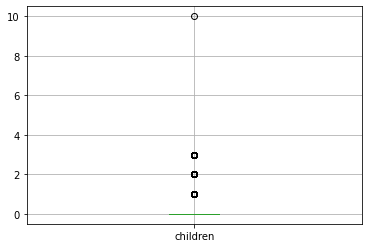

In [21]:
df.boxplot(column=['children'])

We detected outliers in the 'children' column. Therefore, we will impute the missing values in 'children' with the median.

In [22]:
df['children'].median()

0.0

In [23]:
df['children'].fillna(0, inplace=True)

#### CATEGORICAL DATA

To handle categorical data, in this case, the 'country' column, we will directly impute the missing values with its mode.

In [24]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [25]:
df['country'].fillna('PRT', inplace=True)

Now, we recheck to ensure there are no missing values anymore.

In [26]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                

All the missing values have been handled, and there are no missing values remaining.

## FEATURE ENGINEERING

Dividing variables in `df` into 'numerical_columns' and 'categorical_columns'

In [27]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [28]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'arrival_date'],
      dtype='object')

### ENCODING

Clustering only accepts numerical variables. Therefore, we have to encode the categorical variables to convert them into numerical variables.

In [29]:
df_encoded = df.copy()

For k-means clustering, one-hot encoding is preferred for nominal categorical variables to avoid an artificial ordinal relationship. However, for variables with many categories, label encoding may be more practical to avoid a high-dimensional feature space.

In [30]:
df[categorical_columns].nunique()

hotel                        2
meal                         5
country                    177
market_segment               8
distribution_channel         5
reserved_room_type          10
assigned_room_type          12
deposit_type                 3
customer_type                4
reservation_status           3
reservation_status_date    926
arrival_date               793
dtype: int64

From the code above, we can see that 'country', 'reservation_status_date', and 'arrival_date' have over 100 unique values. As mentioned earlier, we will use label encoding for variables with a high number of categories or unique values. We will set a threshold of 10 unique values as our standard.

- One-Hot Encoding will be applied to categorical variables with less than 10 unique values.
- Label Encoding will be applied to variables with more than 10 unique values.

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot_columns = []
label_encode_columns = []

for col in categorical_columns:
    if len(df[col].unique()) <= 10:
        onehot_columns.append(col)
    else:
        label_encode_columns.append(col)
        
onehot_encoded = pd.get_dummies(df[onehot_columns])
label_encoded = df[label_encode_columns].apply(LabelEncoder().fit_transform)
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), onehot_encoded,
                        label_encoded], axis=1)

In [32]:
df_encoded.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,country,assigned_room_type,reservation_status_date,arrival_date
0,0,342,27,0,0,2,0.0,0,0,0,...,0,1,0,0,1,0,135,2,121,0
1,0,737,27,0,0,2,0.0,0,0,0,...,0,1,0,0,1,0,135,2,121,0
2,0,7,27,0,1,1,0.0,0,0,0,...,0,1,0,0,1,0,59,2,122,0
3,0,13,27,0,1,1,0.0,0,0,0,...,0,1,0,0,1,0,59,0,122,0
4,0,14,27,0,2,2,0.0,0,0,0,...,0,1,0,0,1,0,59,0,123,0


In [33]:
df_encoded.shape

(119390, 60)

Now, all the categorical variables have been encoded into numerical variables, making our dataset have a total of 60 columns.

In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 60 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119390 non-null  float64
 7   babies                          119390 non-null  int64  
 8   is_repeated_guest               119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  days_in_waiting_

In [35]:
df_encoded.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserv

### STANDARDIZATION

Now, the dataset is in a suitable format for k-means clustering, but we still need to scale the numerical features. Scaling is crucial for k-means due to its reliance on distance calculations. We will use StandardScaler, which standardizes features by removing the mean and scaling to unit variance. This is particularly useful in preserving the shape of the dataset's distribution.

In [36]:
df_scaled = df_encoded.copy()

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

In [38]:
df_scaled.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,country,assigned_room_type,reservation_status_date,arrival_date
0,-0.76704,2.227051,-0.012141,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,...,0,1,0,0,1,0,135,2,121,0
1,-0.76704,5.923385,-0.012141,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,...,0,1,0,0,1,0,135,2,121,0
2,-0.76704,-0.907814,-0.012141,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,...,0,1,0,0,1,0,59,2,122,0
3,-0.76704,-0.851667,-0.012141,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,...,0,1,0,0,1,0,59,0,122,0
4,-0.76704,-0.842309,-0.012141,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,...,0,1,0,0,1,0,59,0,123,0


## MODELING CLUSTERING

With the dataset now encoded and scaled, it is ready for clustering analysis, such as k-means. This preprocessing ensures that the algorithm treats all features equally, which is especially important since k-means is sensitive to the scale of the data.

We choose the k-means algorithm for clustering in this hotel booking demand dataset because of its simplicity, scalability, and efficiency in identifying natural groupings in large datasets, making it suitable for exploratory analysis and customer segmentation.

Before proceeding with clustering, we will determine the most optimal k value using two methods: silhouette score and the elbow method. We will apply both methods to compare the results using both `df_encoded` and `df_scaled`.

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### FIND THE MOST OPTIMAL K VALUE FROM 'df_encoded'

#### SILHOUTTE SCORE

In [40]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df_encoded)
    #calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(df_encoded, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.5007804653811228
For n_clusters = 3 The average silhouette_score is : 0.4107143475986114
For n_clusters = 4 The average silhouette_score is : 0.3462735944486711
For n_clusters = 5 The average silhouette_score is : 0.34823139254592295
For n_clusters = 6 The average silhouette_score is : 0.30570947029330015
For n_clusters = 7 The average silhouette_score is : 0.30637537209859
For n_clusters = 8 The average silhouette_score is : 0.312180035196859
For n_clusters = 9 The average silhouette_score is : 0.3155448164783204


#### ELBOW METHOD

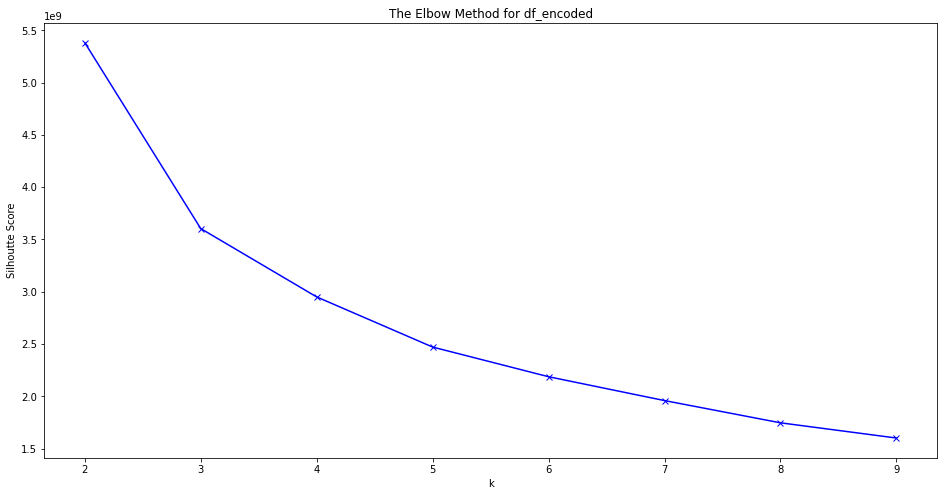

In [41]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte Score')
plt.title('The Elbow Method for df_encoded')
plt.show()

From the silhouette score, the most optimal k value is 2, where the average silhouette score is 0.5. Meanwhile, from the elbow method, the most optimal k value is 3, as it exhibits an elbow in the plot.

### FIND THE MOST OPTIMAL K VALUE FROM 'df_scaled'

#### SILHOUTTE SCORE

In [42]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df_scaled)
    #calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(df_scaled, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.5724637583509534
For n_clusters = 3 The average silhouette_score is : 0.5160092987375203
For n_clusters = 4 The average silhouette_score is : 0.48212706066088207
For n_clusters = 5 The average silhouette_score is : 0.43373618037313977
For n_clusters = 6 The average silhouette_score is : 0.39383282684041937
For n_clusters = 7 The average silhouette_score is : 0.4051573992294298
For n_clusters = 8 The average silhouette_score is : 0.37257150212234064
For n_clusters = 9 The average silhouette_score is : 0.34496564377014155


#### ELBOW METHOD

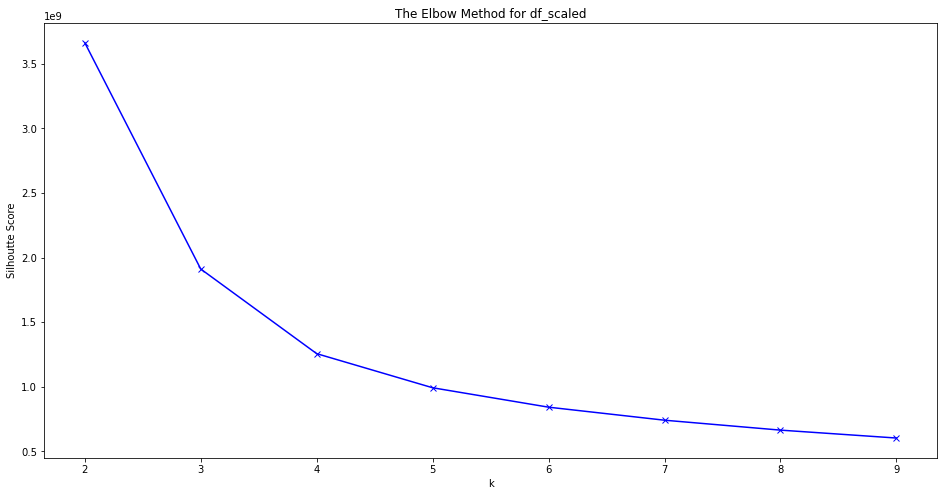

In [43]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte Score')
plt.title('The Elbow Method for df_scaled')
plt.show()

From the silhouette score, the most optimal k value is also 2, where the average silhouette score is 0.57. Meanwhile, from the elbow method, the most optimal k value is 3, as it exhibits an elbow in the plot.

From both results, **'df_scaled' gives a higher average silhouette score** than 'df_encoded'. Therefore, we will use 'df_scaled' in our clustering. Since using the average silhouette score is considered more accurate than the elbow method, we will proceed with **k = 2**, following the silhouette score result.

In [44]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_scaled)

KMeans(n_clusters=2)

In [45]:
df_scaled['k_means']=kmeanModel.predict(df_scaled)

In [46]:
df_scaled.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,country,assigned_room_type,reservation_status_date,arrival_date,k_means
0,-0.76704,2.227051,-0.012141,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,...,1,0,0,1,0,135,2,121,0,1
1,-0.76704,5.923385,-0.012141,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,...,1,0,0,1,0,135,2,121,0,1
2,-0.76704,-0.907814,-0.012141,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,...,1,0,0,1,0,59,2,122,0,1
3,-0.76704,-0.851667,-0.012141,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,...,1,0,0,1,0,59,0,122,0,1
4,-0.76704,-0.842309,-0.012141,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,...,1,0,0,1,0,59,0,123,0,1


Now, we want to fit the cluster results into `df` by adding new column 'clusters'

In [47]:
df['clusters']=kmeanModel.fit_predict(df_scaled)

In [48]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,clusters
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,0
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,0


In [49]:
df['clusters'].value_counts()

1    60363
0    59027
Name: clusters, dtype: int64

Cluster has successfully added to df, now we want to fit it to `df_encoded` to help our analysis on each clusters

In [50]:
df_encoded['clusters']=kmeanModel.fit_predict(df_scaled)

In [51]:
df_encoded['clusters'].value_counts()

0    60408
1    58982
Name: clusters, dtype: int64

## PERSONAL ANALYSIS

#### CLUSTER 0

In [52]:
cluster_0=df_encoded[df_encoded['clusters']==0]

In [53]:
cluster_0.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserv

In [54]:
num_fea = cluster_0[['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show', 'country',
       'assigned_room_type', 'reservation_status_date', 'arrival_date']]

In [55]:
num_fea.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,country,assigned_room_type,reservation_status_date,arrival_date
count,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,...,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000,60408.000000
mean,0.344491,103.326348,26.740266,0.963978,2.549977,1.868147,0.120266,0.007350,0.034499,0.012316,...,0.004900,0.813667,0.167014,0.335701,0.655509,0.008790,85.414779,1.422245,708.283671,610.757681
std,0.475206,103.884564,14.166453,1.002782,1.942138,0.501142,0.424966,0.086954,0.182508,0.189570,...,0.069829,0.389378,0.372992,0.472239,0.475206,0.093344,44.751840,1.926011,112.563457,110.871107
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,388.000000
25%,0.000000,20.000000,15.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000,0.000000,613.000000,508.000000
50%,0.000000,69.000000,26.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,59.000000,0.000000,707.000000,624.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,135.000000,3.000000,801.000000,704.000000
max,1.000000,626.000000,53.000000,16.000000,41.000000,4.000000,3.000000,2.000000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,176.000000,11.000000,925.000000,792.000000


From the descriptive table above, we can observe the statistical summary of each numerical column from Cluster 0

In [56]:
cat_cols=cluster_0.select_dtypes(include=['object']).columns
num_cols = num_fea.select_dtypes(include=np.number).columns.tolist()

In [57]:
cat_cols

Index([], dtype='object')

In [58]:
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Aviation',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'reserved_room_type_A',
 'reserved_room_type_B',
 'reserved_room_type_C',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reserved_room_type_F'

Visualize each numerical variable from Cluster 0 to observe the data distribution

is_canceled
Skew : 0.65


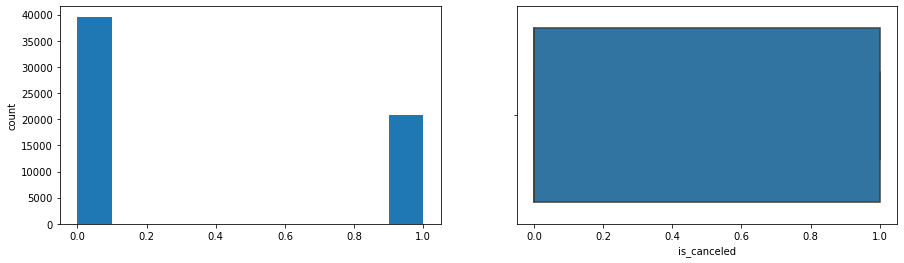

lead_time
Skew : 1.33


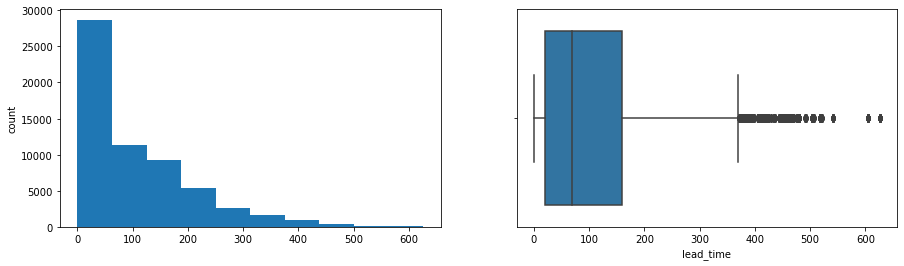

arrival_date_week_number
Skew : 0.04


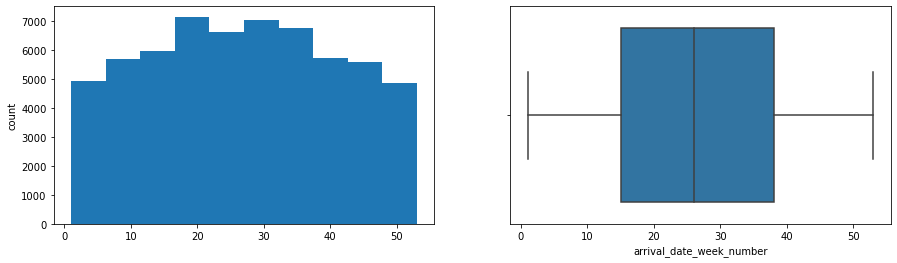

stays_in_weekend_nights
Skew : 1.34


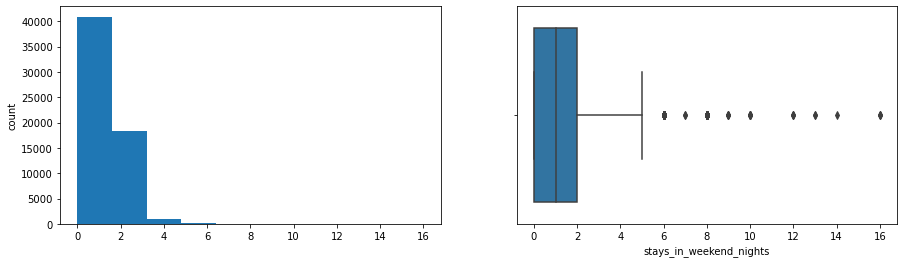

stays_in_week_nights
Skew : 2.85


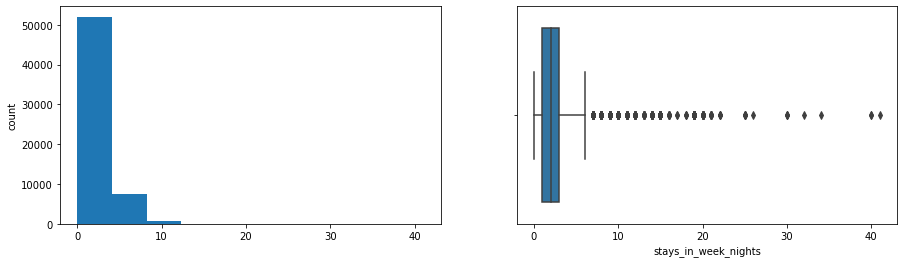

adults
Skew : -0.4


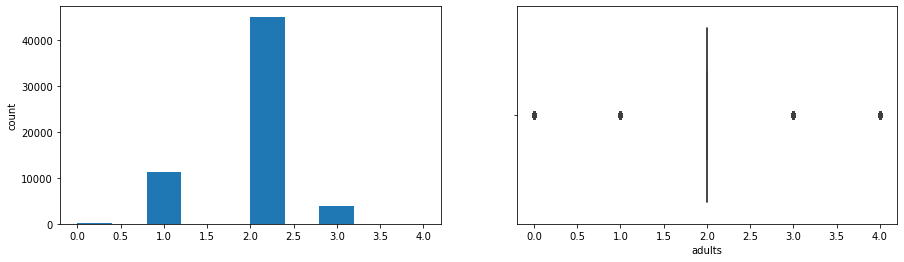

children
Skew : 3.68


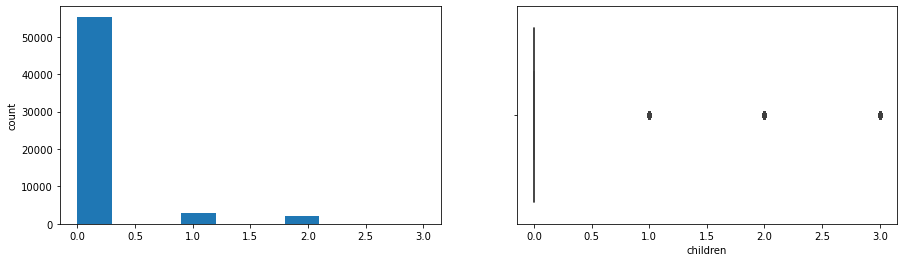

babies
Skew : 12.13


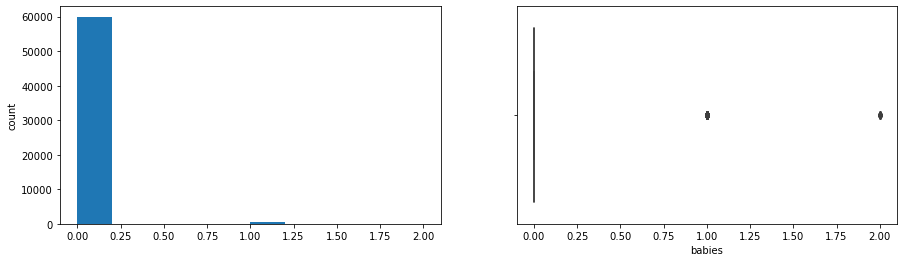

is_repeated_guest
Skew : 5.1


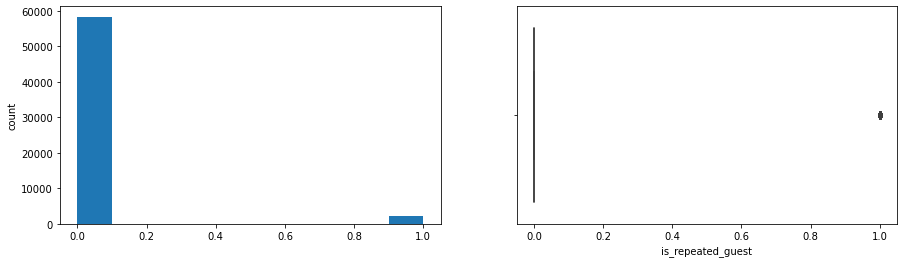

previous_cancellations
Skew : 21.5


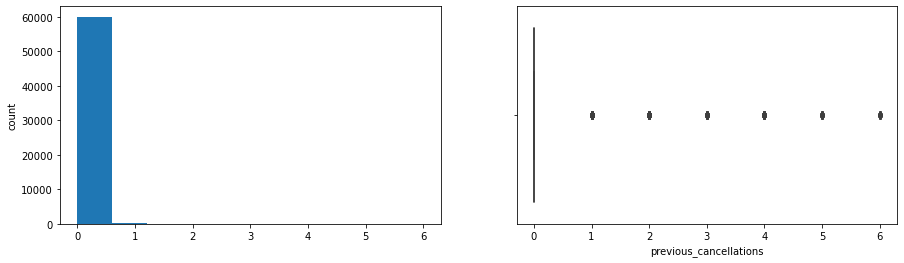

previous_bookings_not_canceled
Skew : 22.41


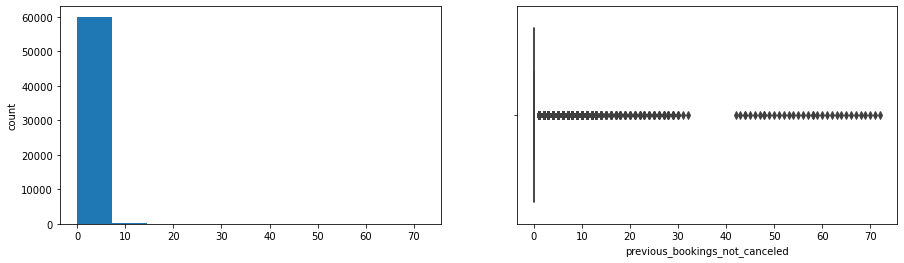

booking_changes
Skew : 5.07


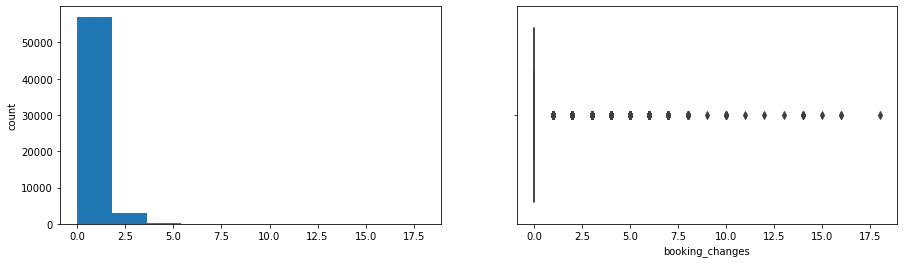

days_in_waiting_list
Skew : 16.74


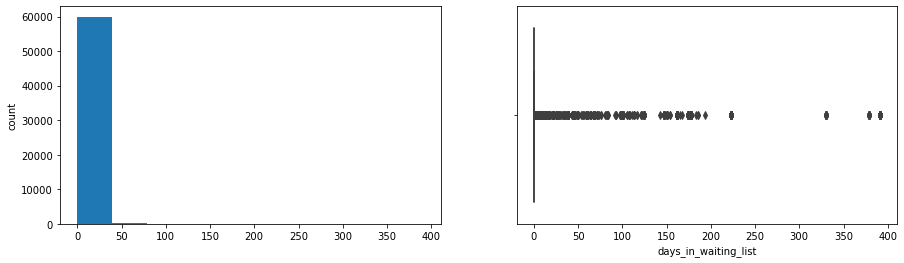

adr
Skew : 0.96


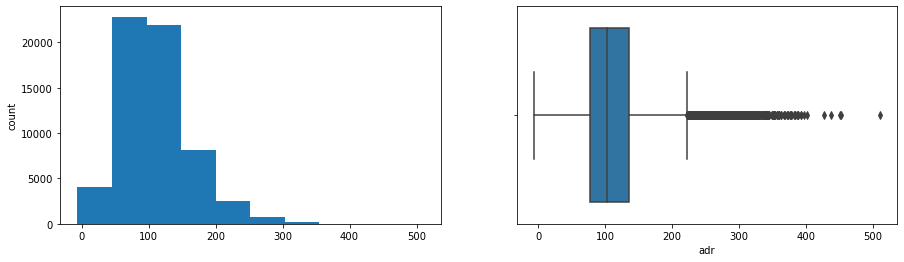

required_car_parking_spaces
Skew : 4.61


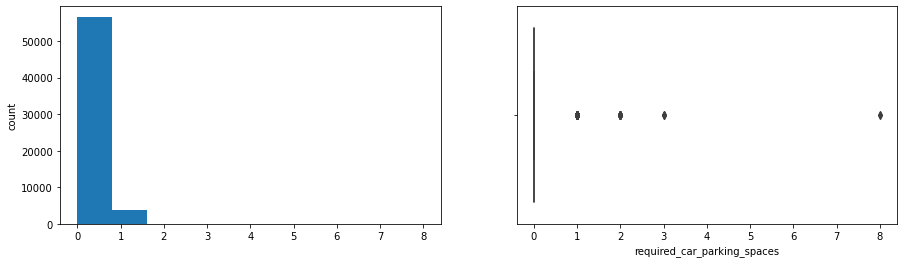

total_of_special_requests
Skew : 1.14


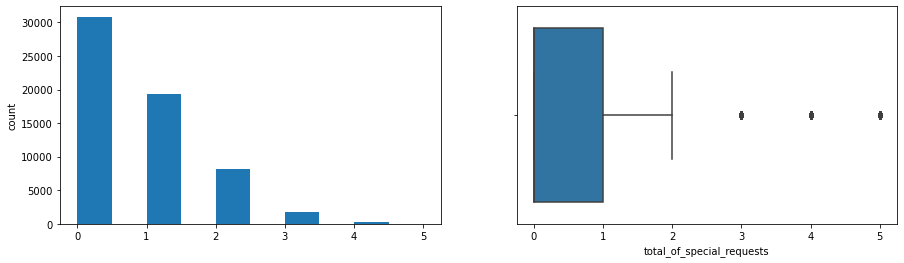

hotel_City Hotel
Skew : -0.73


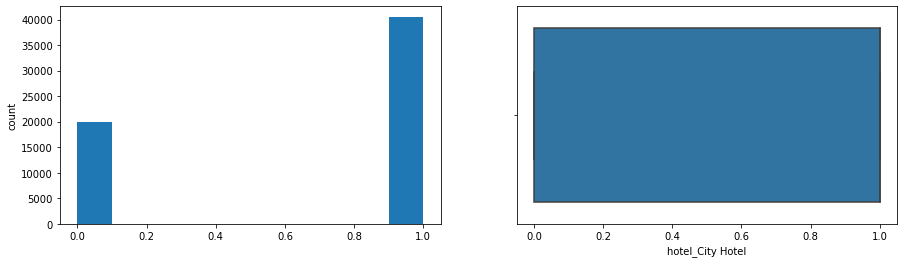

hotel_Resort Hotel
Skew : 0.73


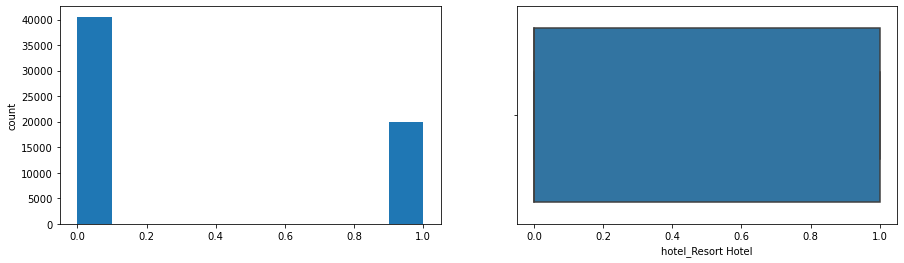

meal_BB
Skew : -1.19


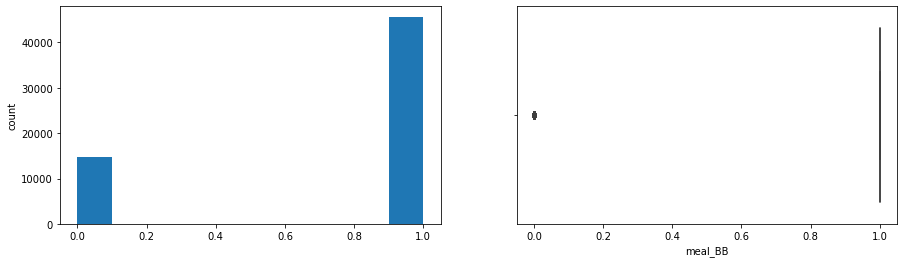

meal_FB
Skew : 19.23


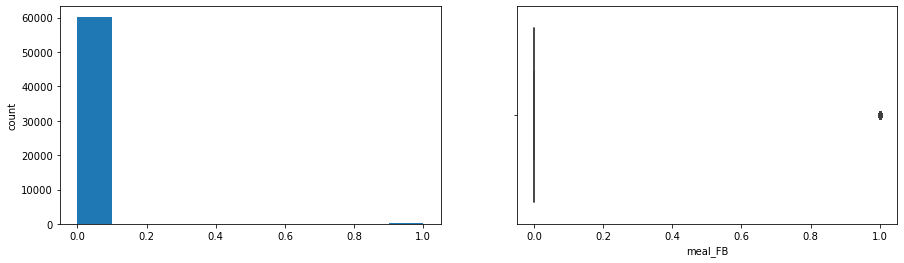

meal_HB
Skew : 2.5


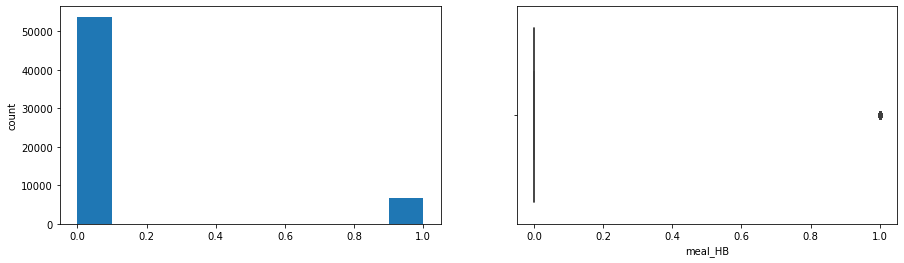

meal_SC
Skew : 2.3


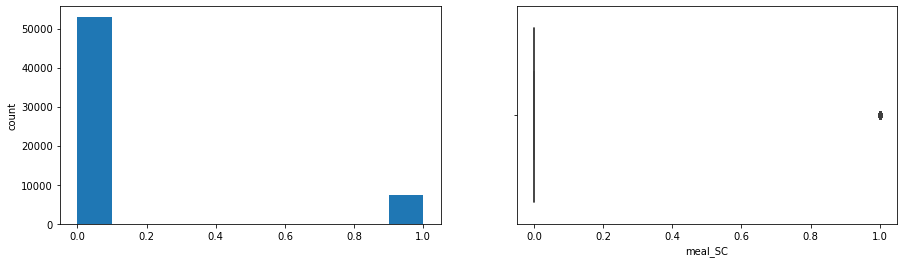

meal_Undefined
Skew : 10.05


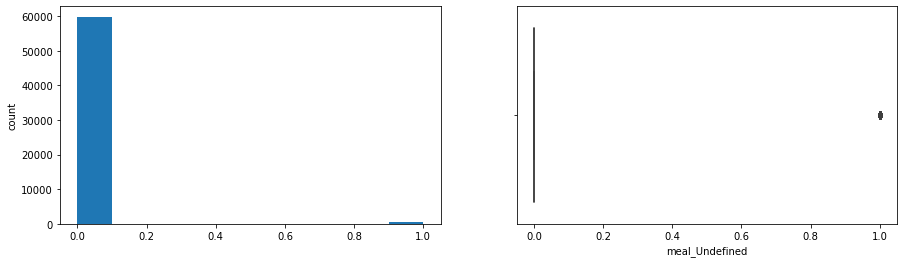

market_segment_Aviation
Skew : 18.77


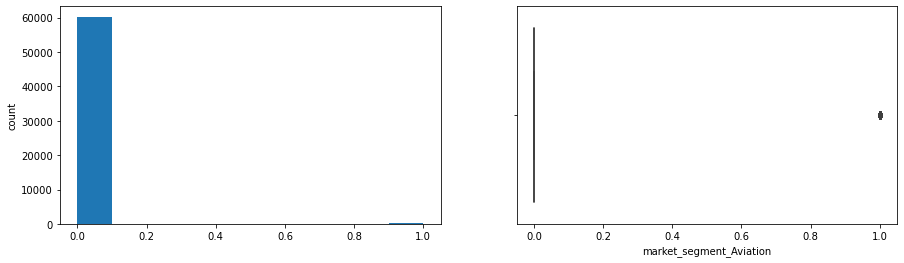

market_segment_Complementary
Skew : 12.46


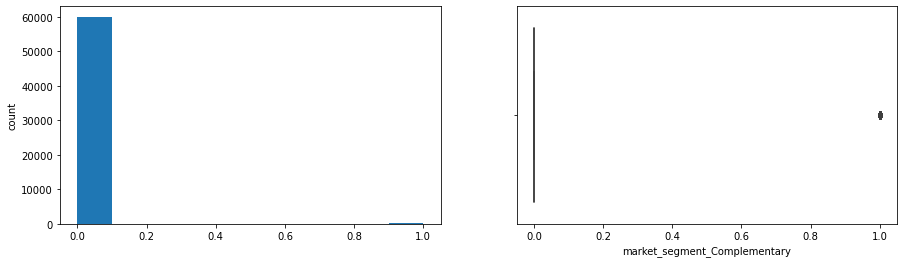

market_segment_Corporate
Skew : 4.7


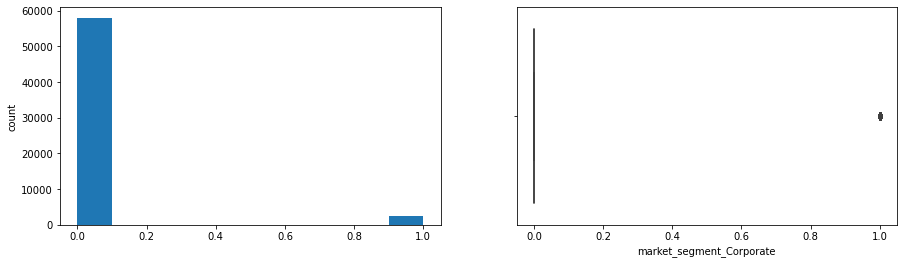

market_segment_Direct
Skew : 2.45


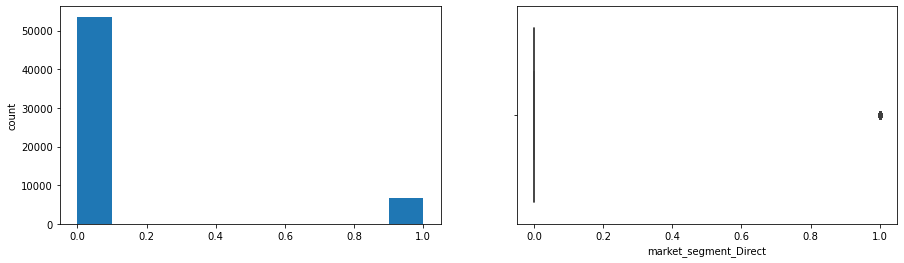

market_segment_Groups
Skew : 2.26


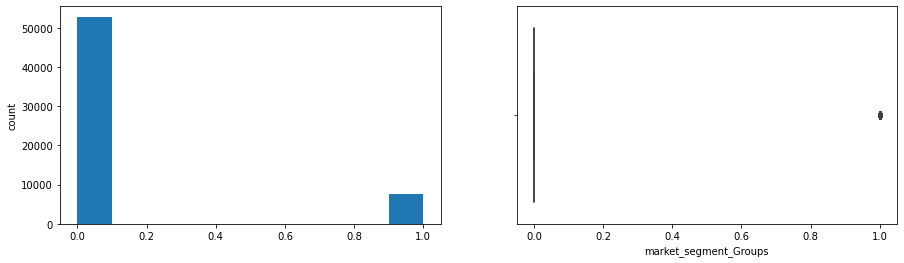

market_segment_Offline TA/TO
Skew : 1.88


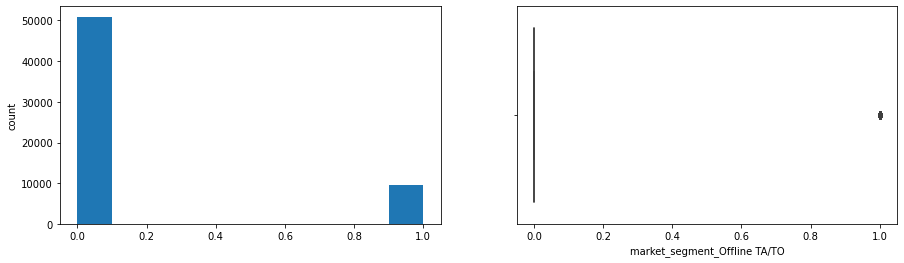

market_segment_Online TA
Skew : -0.22


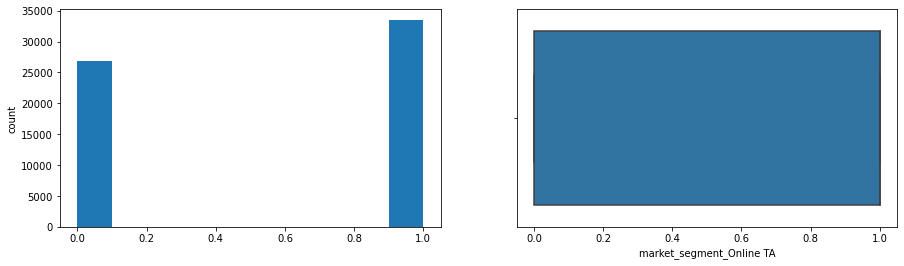

market_segment_Undefined
Skew : 0


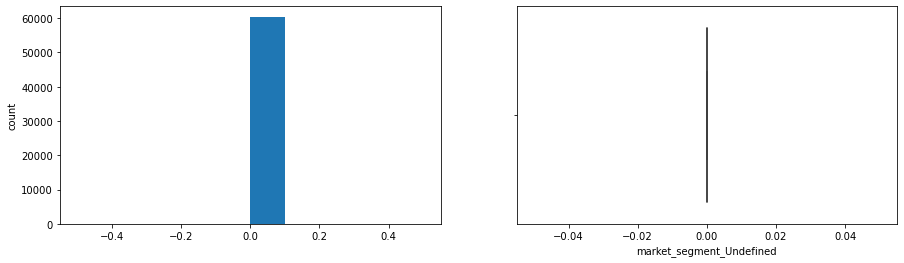

distribution_channel_Corporate
Skew : 3.88


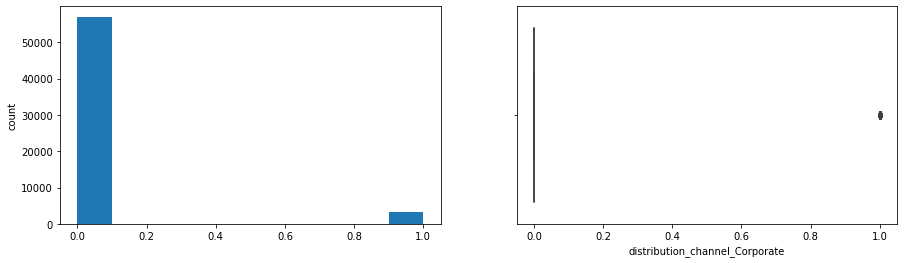

distribution_channel_Direct
Skew : 2.25


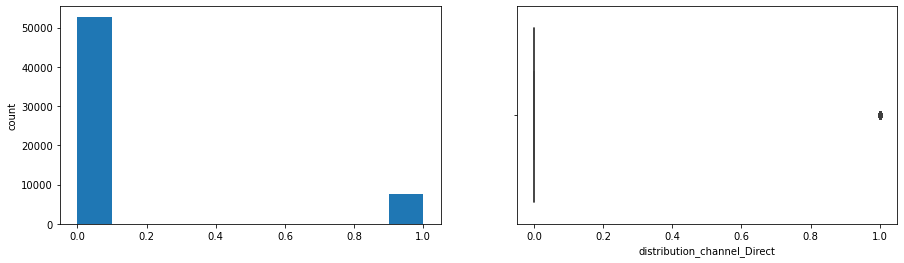

distribution_channel_GDS
Skew : 19.73


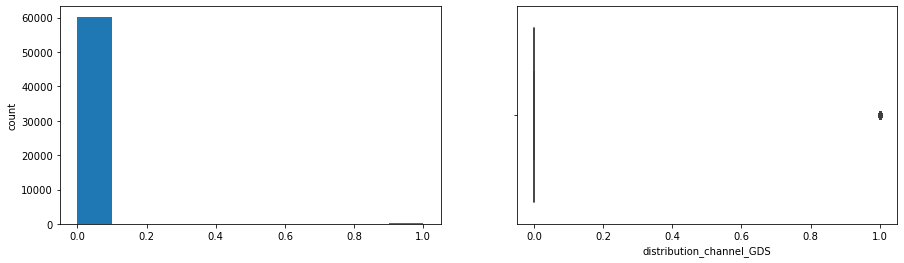

distribution_channel_TA/TO
Skew : -1.63


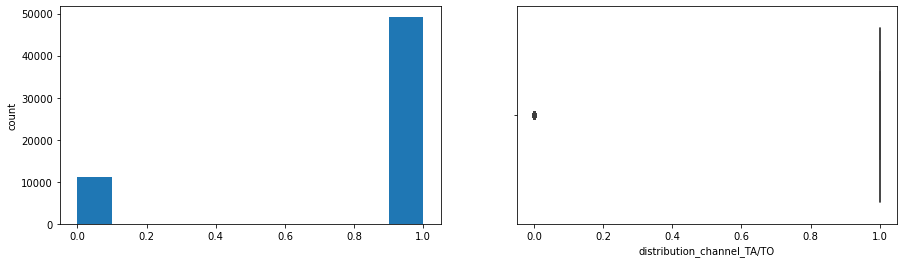

distribution_channel_Undefined
Skew : 0


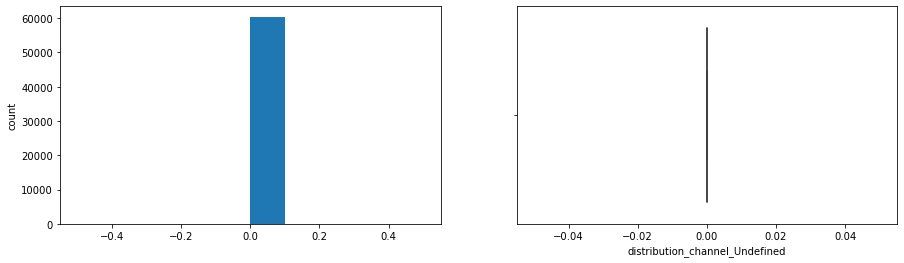

reserved_room_type_A
Skew : -0.78


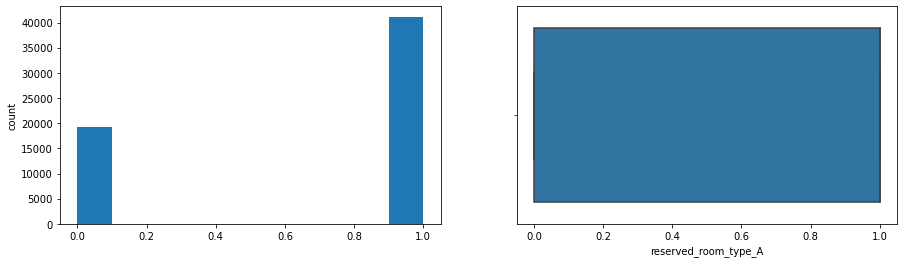

reserved_room_type_B
Skew : 12.31


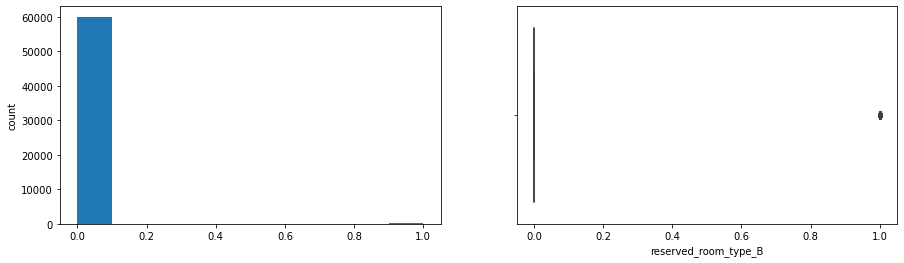

reserved_room_type_C
Skew : 10.09


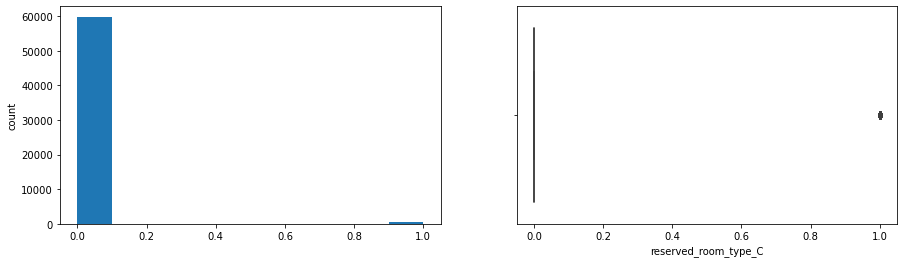

reserved_room_type_D
Skew : 1.63


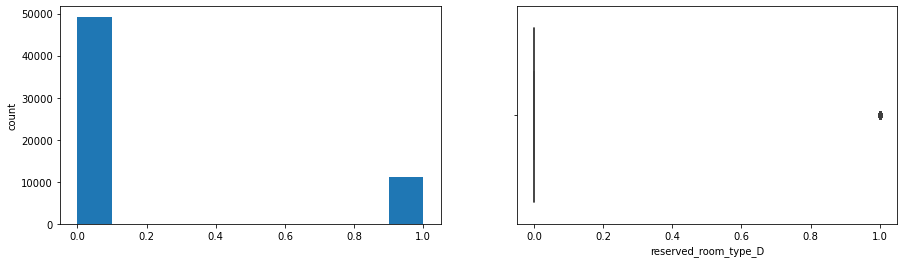

reserved_room_type_E
Skew : 3.55


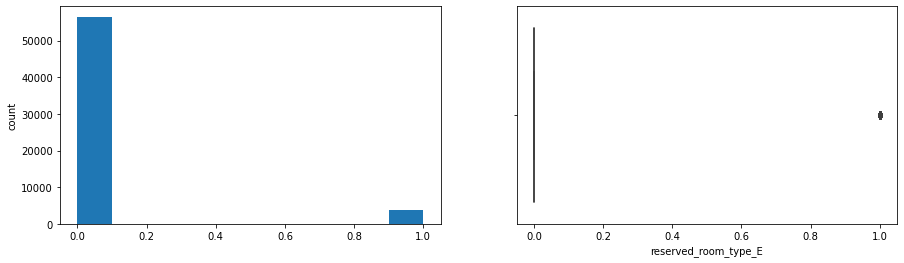

reserved_room_type_F
Skew : 5.71


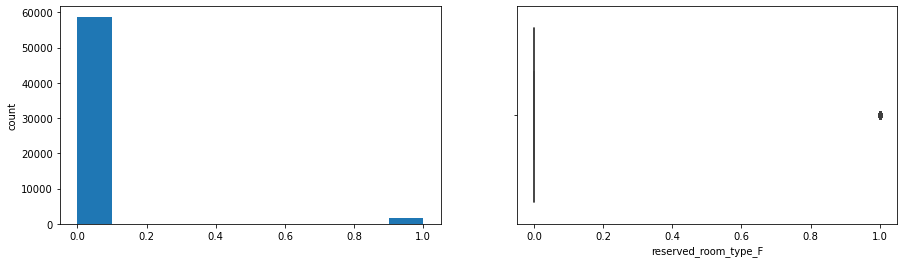

reserved_room_type_G
Skew : 6.82


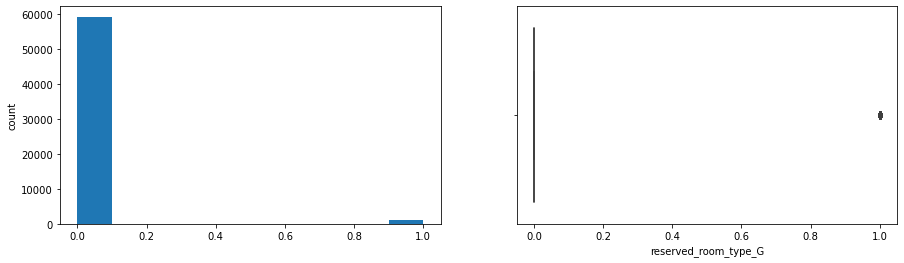

reserved_room_type_H
Skew : 13.42


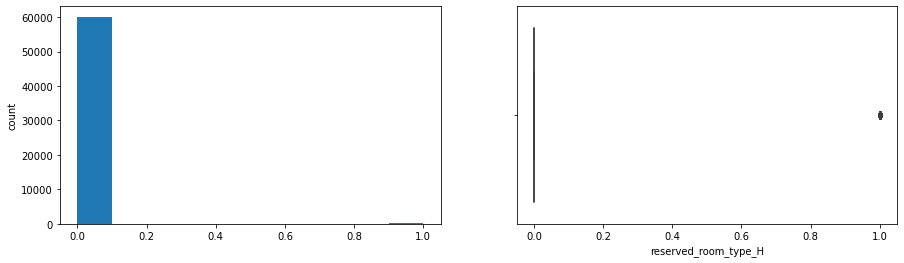

reserved_room_type_L
Skew : 0


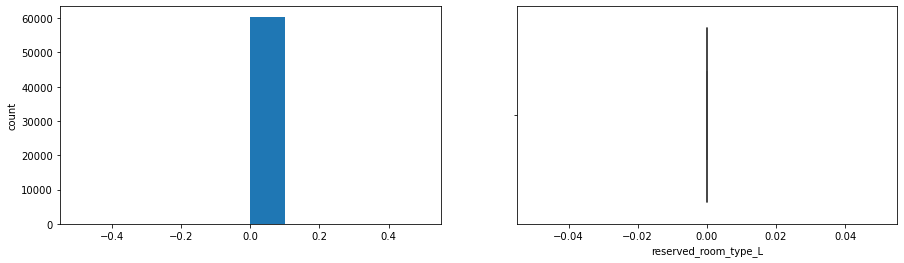

reserved_room_type_P
Skew : 74.09


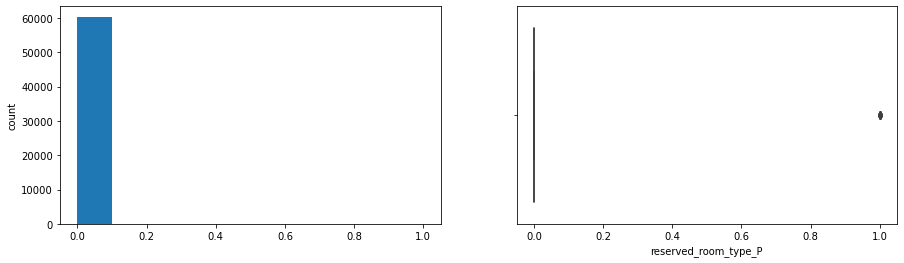

deposit_type_No Deposit
Skew : -3.21


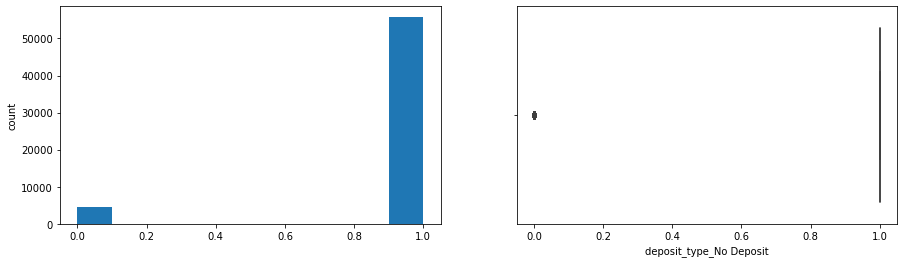

deposit_type_Non Refund
Skew : 3.23


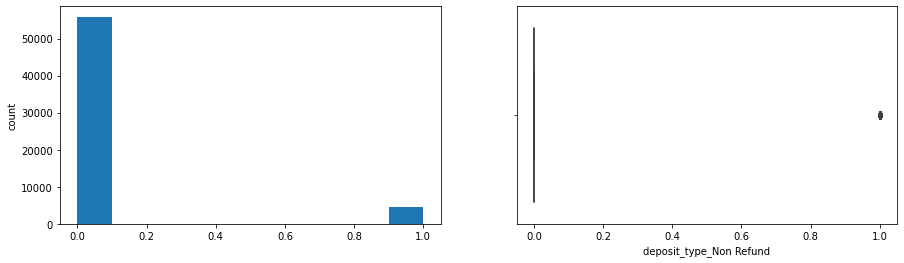

deposit_type_Refundable
Skew : 35.81


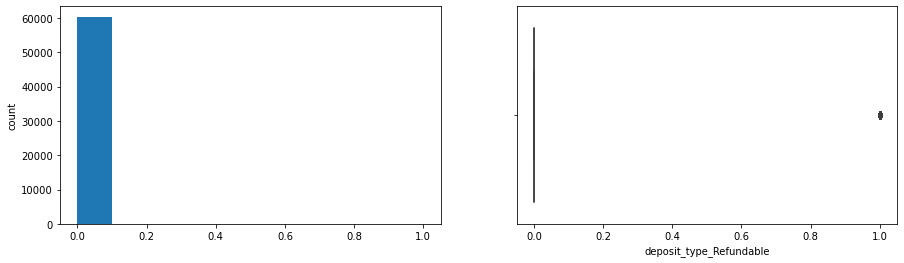

customer_type_Contract
Skew : 8.15


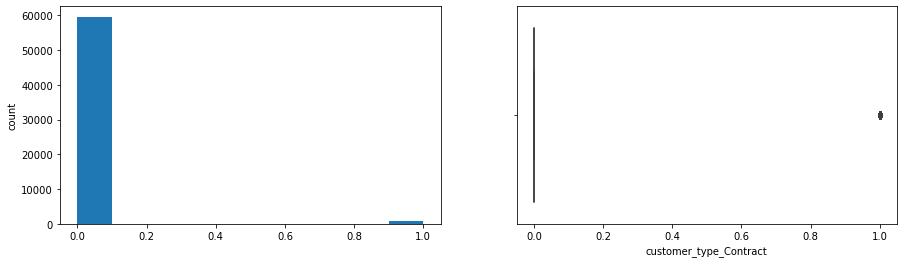

customer_type_Group
Skew : 14.18


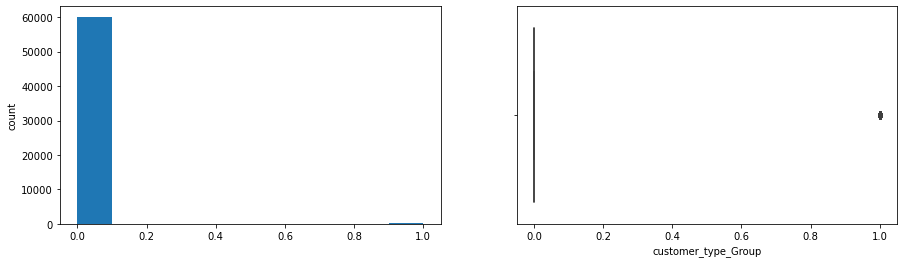

customer_type_Transient
Skew : -1.61


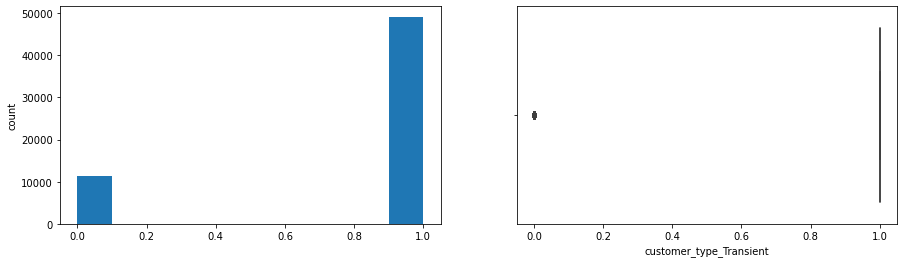

customer_type_Transient-Party
Skew : 1.79


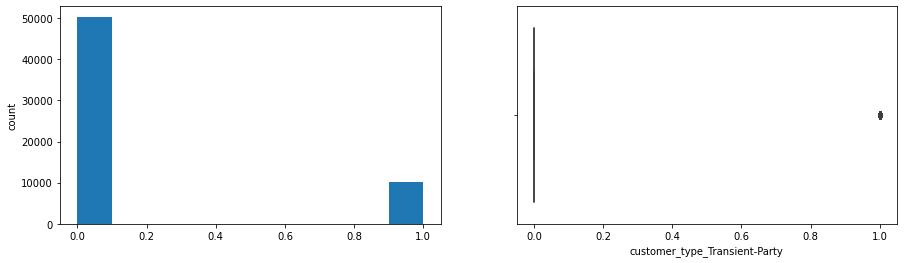

reservation_status_Canceled
Skew : 0.7


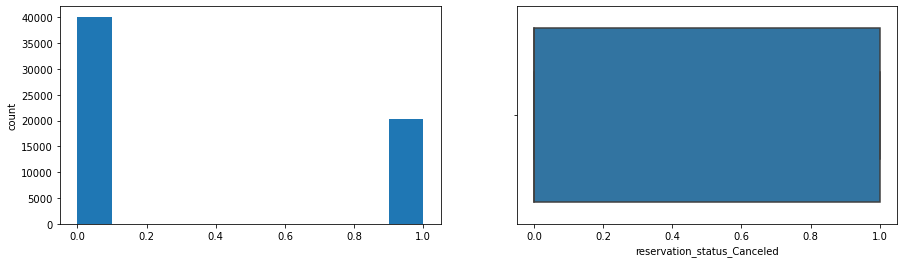

reservation_status_Check-Out
Skew : -0.65


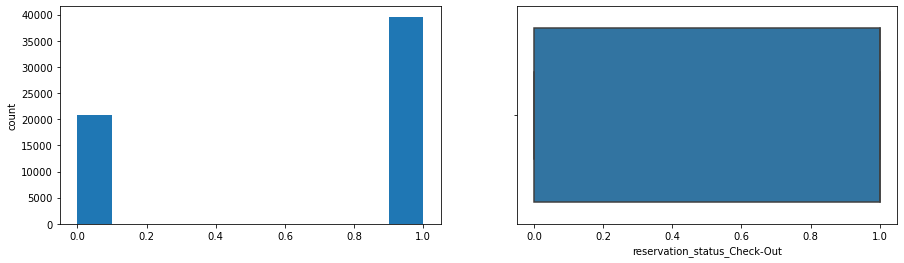

reservation_status_No-Show
Skew : 10.53


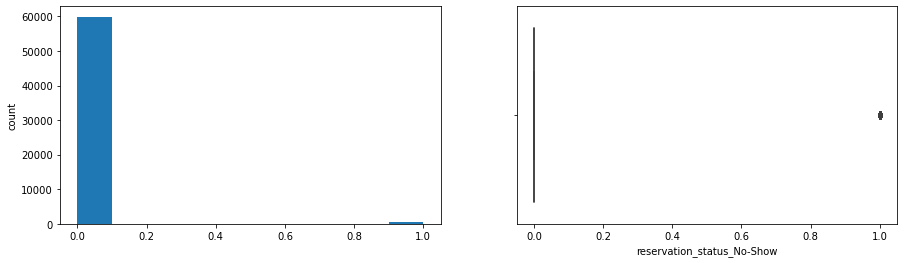

country
Skew : 0.17


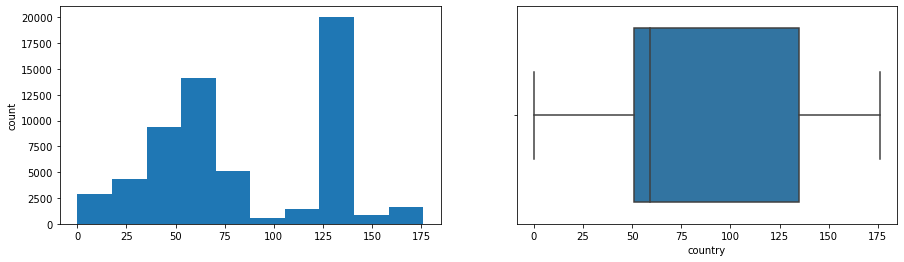

assigned_room_type
Skew : 1.08


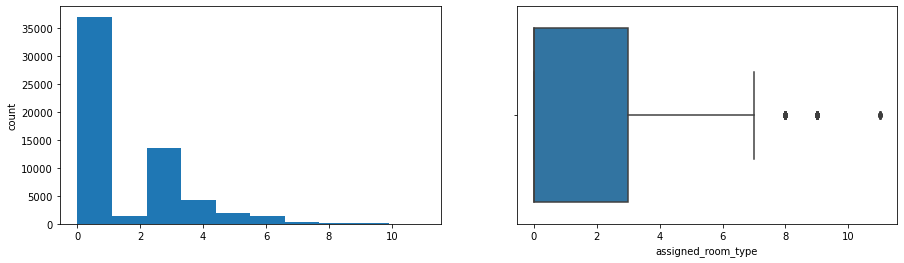

reservation_status_date
Skew : -0.0


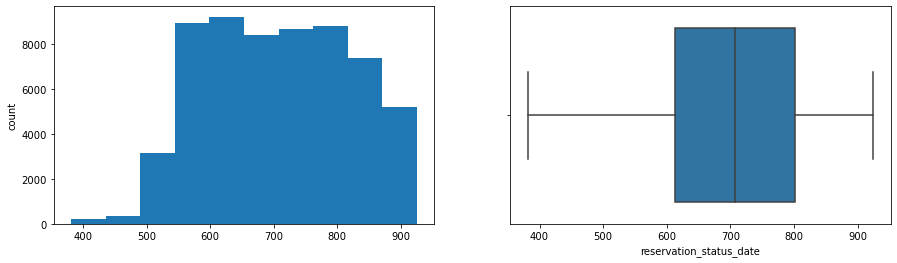

arrival_date
Skew : -0.18


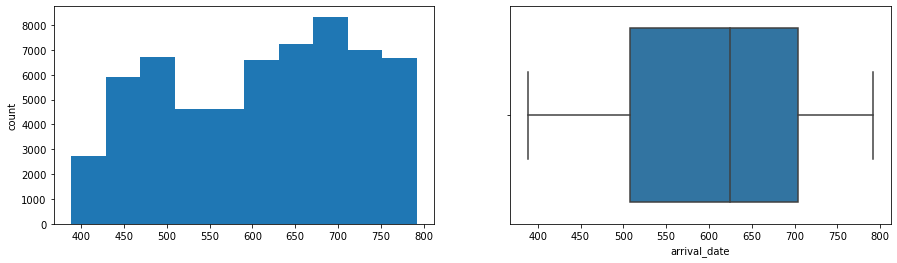

In [59]:
import seaborn as sns
for col in num_cols:
    print(col)
    print('Skew :', round(cluster_0[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    cluster_0[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cluster_0[col])
    plt.show()

#### CLUSTER 1

In [60]:
cluster_1=df_encoded[df_encoded['clusters']==1]

In [61]:
cluster_1.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserv

In [62]:
num_fea_1=cluster_1[['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show', 'country',
       'assigned_room_type', 'reservation_status_date', 'arrival_date']]

In [63]:
num_fea_1.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,country,assigned_room_type,reservation_status_date,arrival_date
count,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,...,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000,58982.000000
mean,0.396969,104.713048,27.600353,0.890339,2.449425,1.844376,0.087111,0.008562,0.029263,0.163728,...,0.004764,0.685989,0.254908,0.385507,0.603031,0.011461,101.096097,1.234309,320.585941,234.132447
std,0.489274,109.826398,12.990887,0.992954,1.871631,0.649387,0.368805,0.107111,0.168545,1.180953,...,0.068859,0.464125,0.435813,0.486719,0.489274,0.106442,43.158975,1.824230,125.349145,129.968401
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,17.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,224.000000,107.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,135.000000,0.000000,334.000000,254.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,135.000000,3.000000,424.000000,337.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,176.000000,11.000000,560.000000,638.000000


From the descriptive table above, we can observe the statistical summary of each numerical column from Cluster 1

In [64]:
cat_cols=cluster_1.select_dtypes(include=['object']).columns
num_cols = num_fea_1.select_dtypes(include=np.number).columns.tolist()

In [65]:
cat_cols

Index([], dtype='object')

In [66]:
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Aviation',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'reserved_room_type_A',
 'reserved_room_type_B',
 'reserved_room_type_C',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reserved_room_type_F'

Visualize each numerical variable from Cluster 1 to observe the data distribution

is_canceled
Skew : 0.65


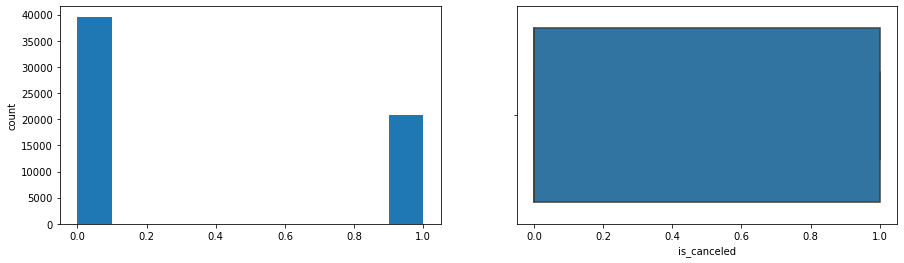

lead_time
Skew : 1.33


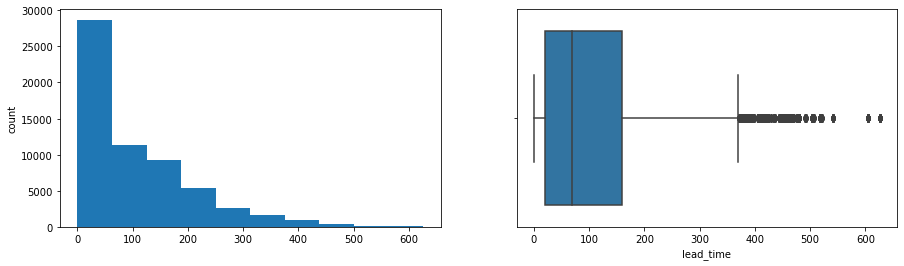

arrival_date_week_number
Skew : 0.04


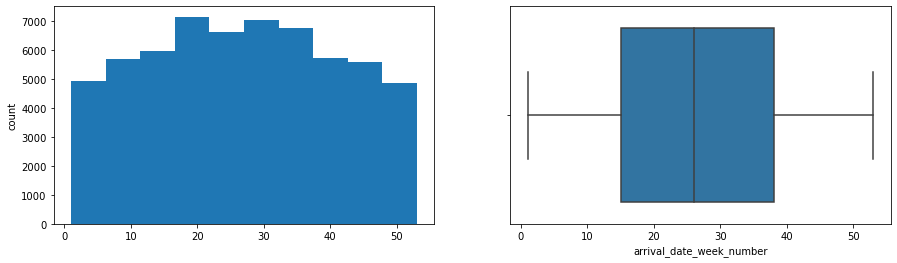

stays_in_weekend_nights
Skew : 1.34


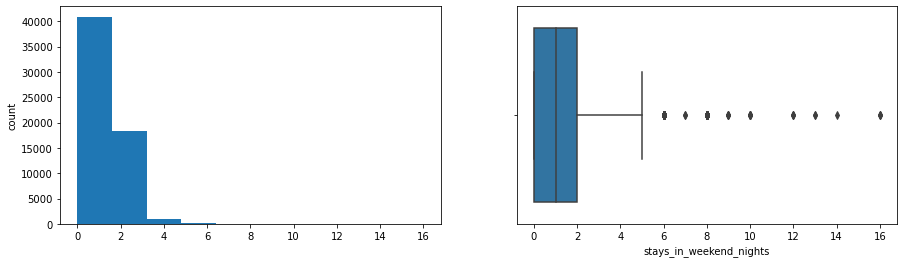

stays_in_week_nights
Skew : 2.85


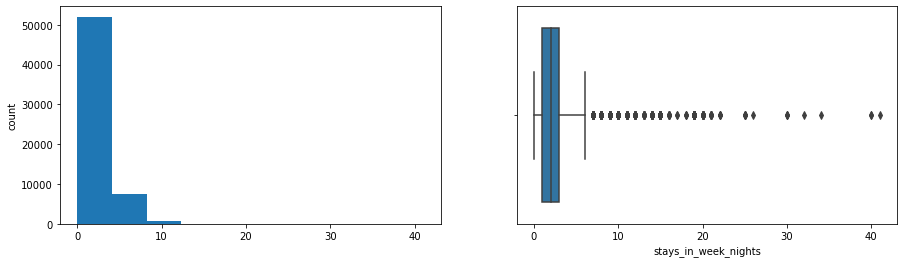

adults
Skew : -0.4


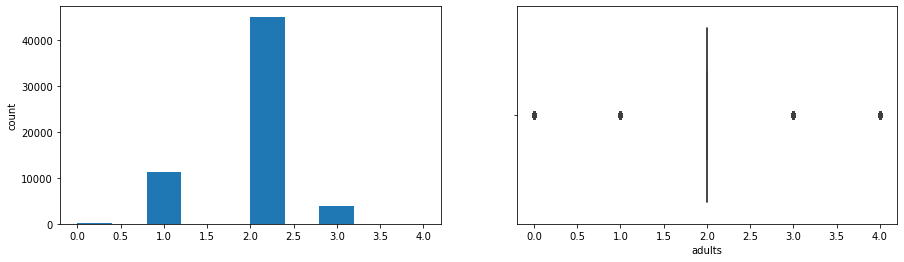

children
Skew : 3.68


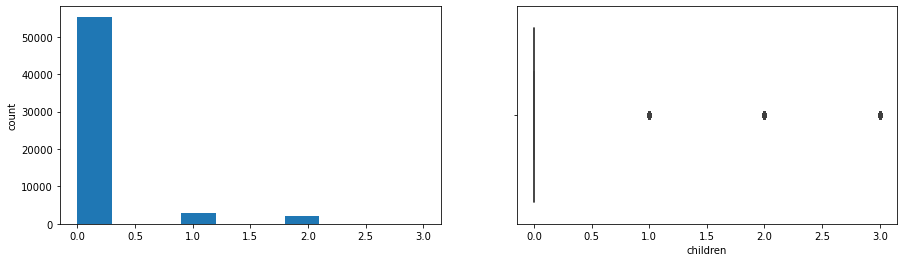

babies
Skew : 12.13


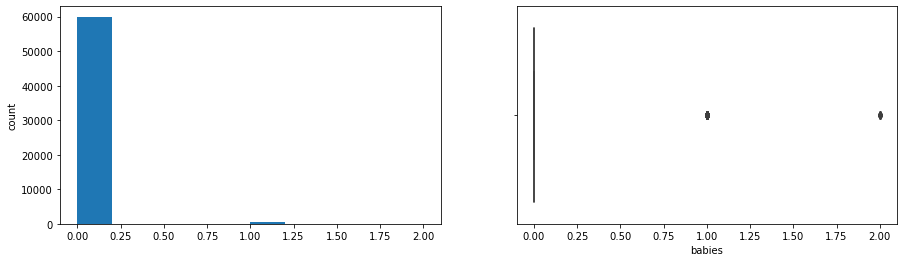

is_repeated_guest
Skew : 5.1


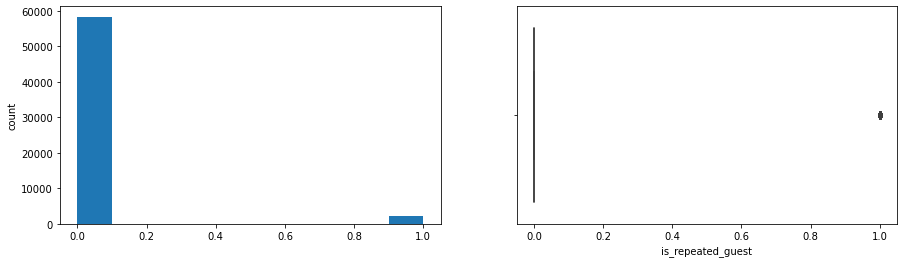

previous_cancellations
Skew : 21.5


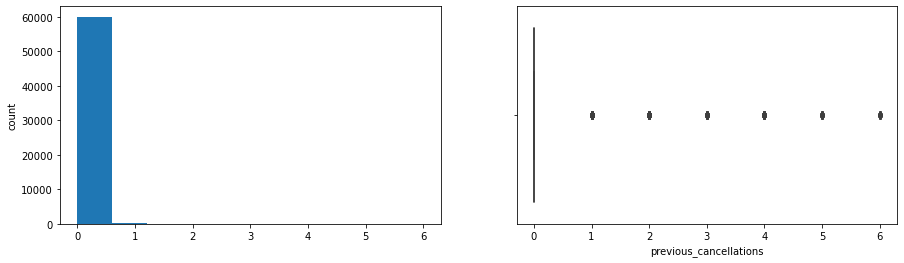

previous_bookings_not_canceled
Skew : 22.41


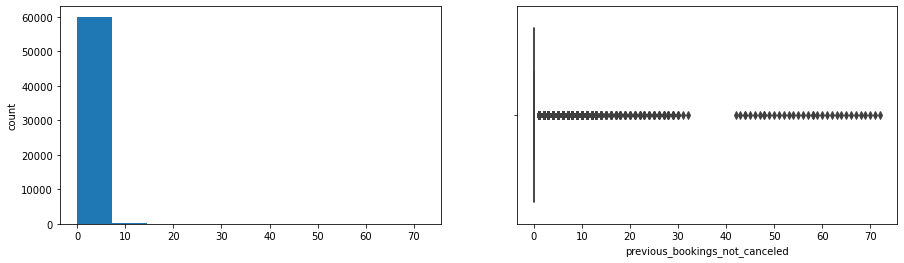

booking_changes
Skew : 5.07


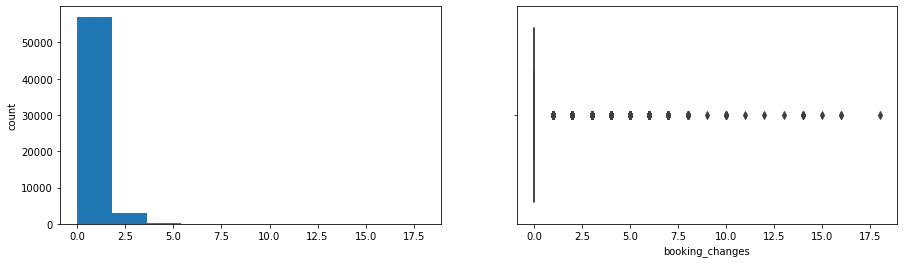

days_in_waiting_list
Skew : 16.74


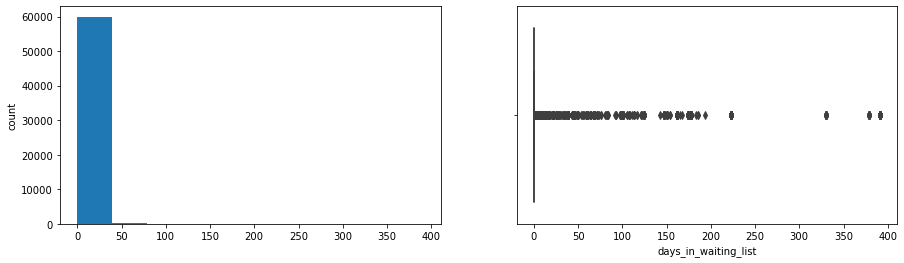

adr
Skew : 0.96


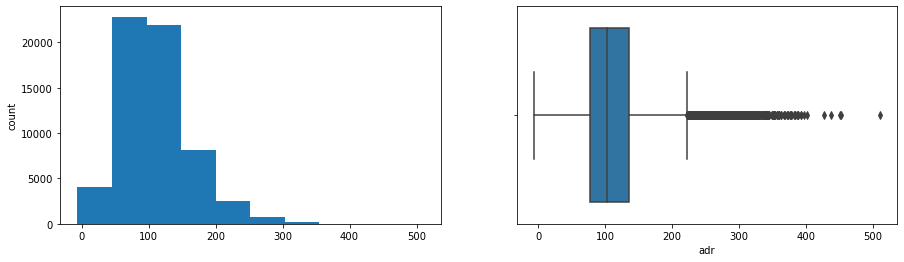

required_car_parking_spaces
Skew : 4.61


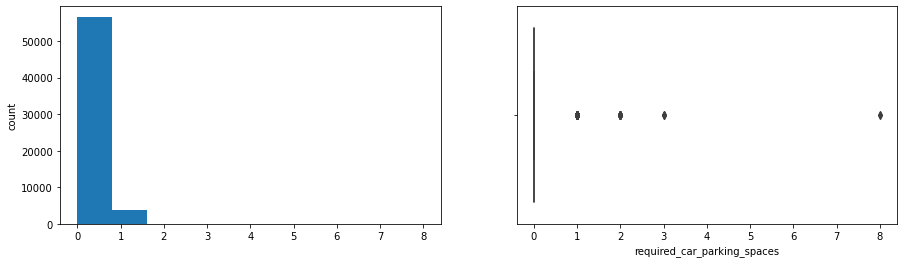

total_of_special_requests
Skew : 1.14


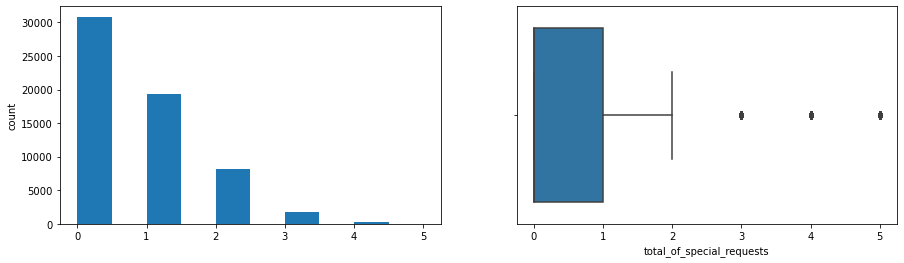

hotel_City Hotel
Skew : -0.73


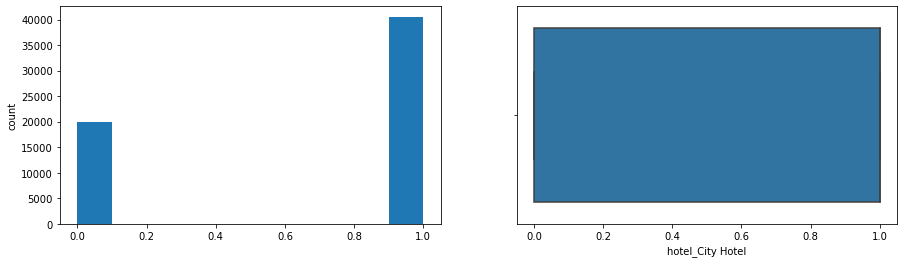

hotel_Resort Hotel
Skew : 0.73


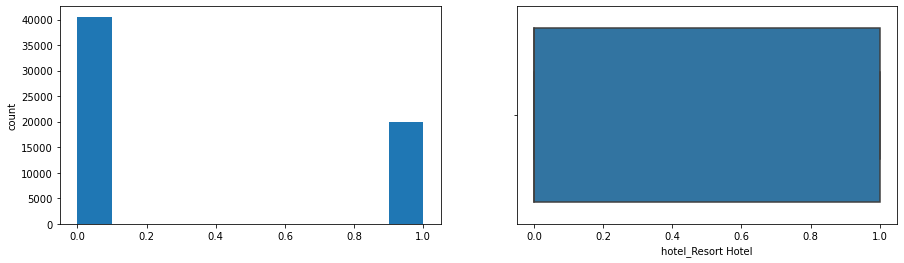

meal_BB
Skew : -1.19


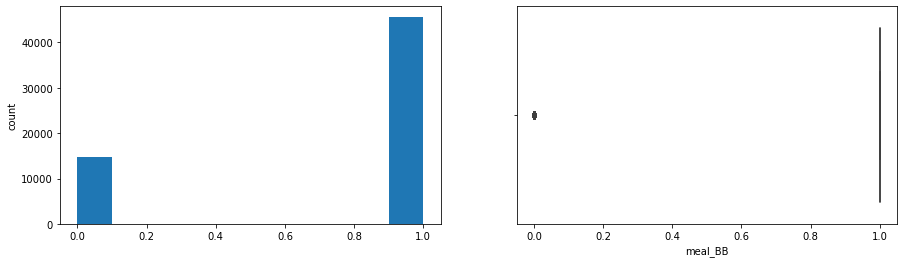

meal_FB
Skew : 19.23


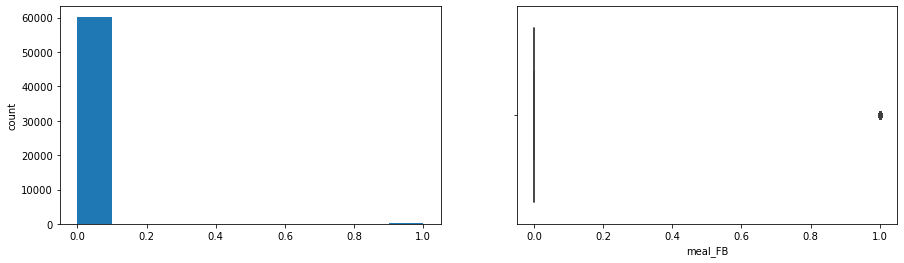

meal_HB
Skew : 2.5


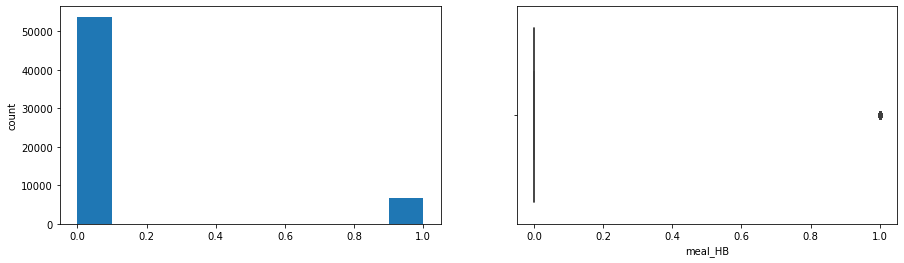

meal_SC
Skew : 2.3


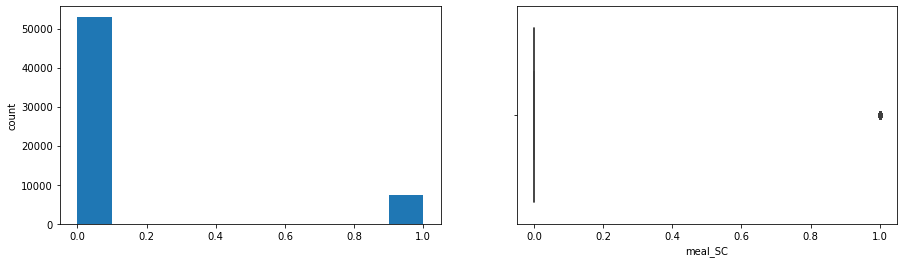

meal_Undefined
Skew : 10.05


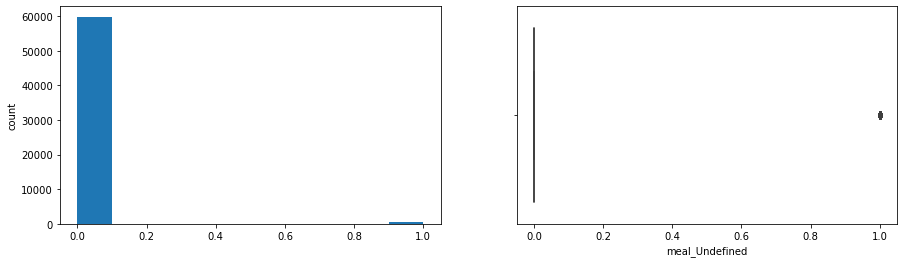

market_segment_Aviation
Skew : 18.77


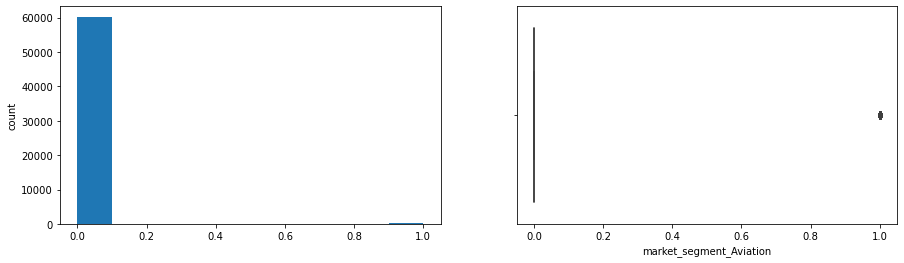

market_segment_Complementary
Skew : 12.46


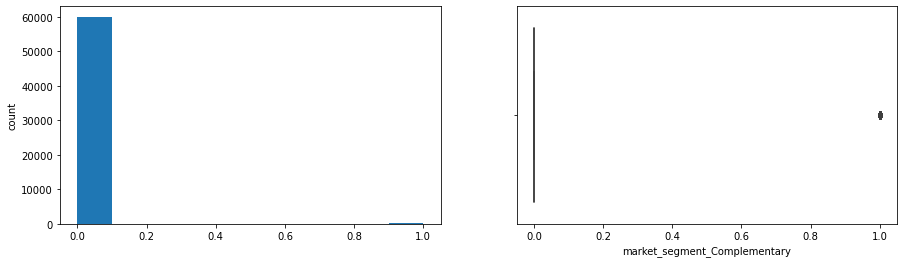

market_segment_Corporate
Skew : 4.7


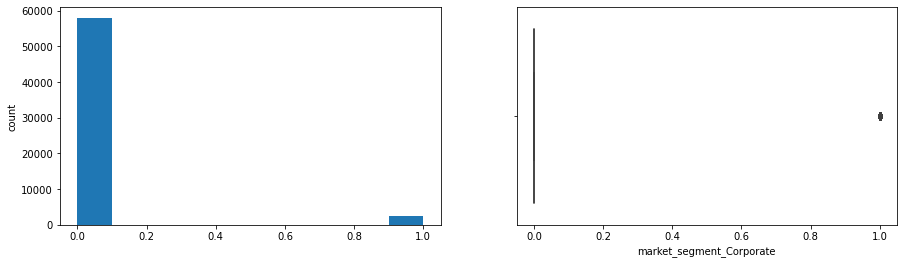

market_segment_Direct
Skew : 2.45


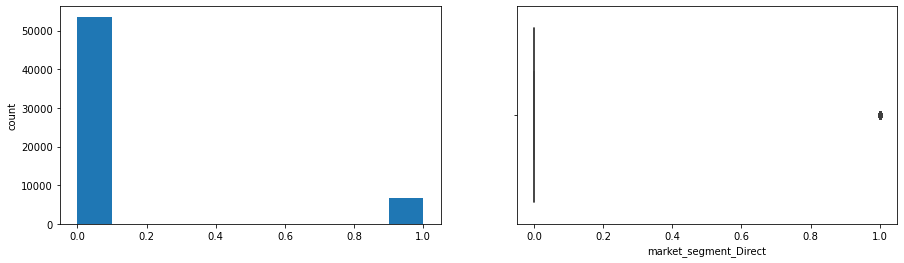

market_segment_Groups
Skew : 2.26


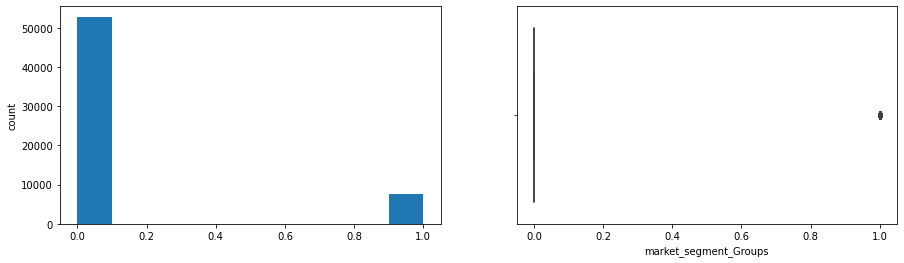

market_segment_Offline TA/TO
Skew : 1.88


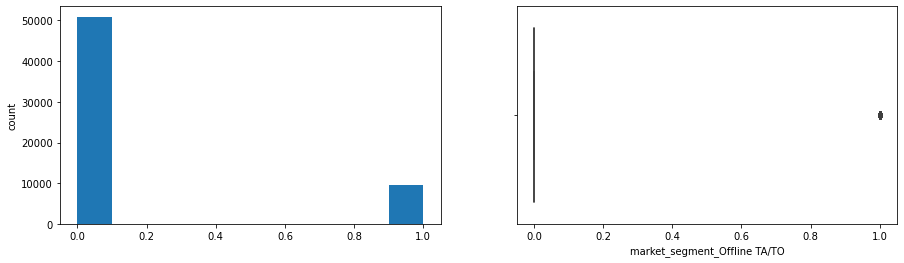

market_segment_Online TA
Skew : -0.22


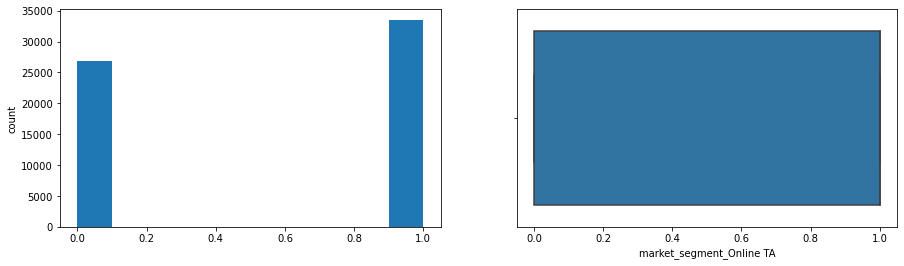

market_segment_Undefined
Skew : 0


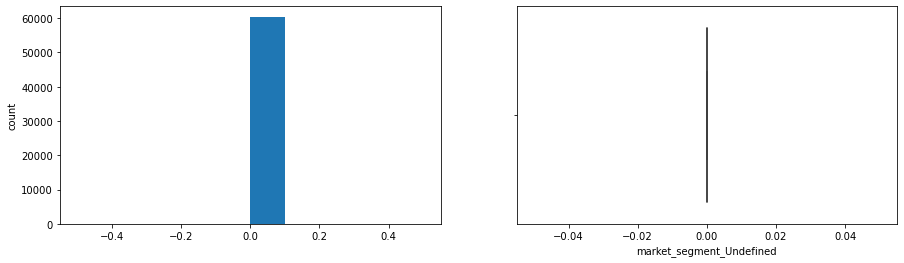

distribution_channel_Corporate
Skew : 3.88


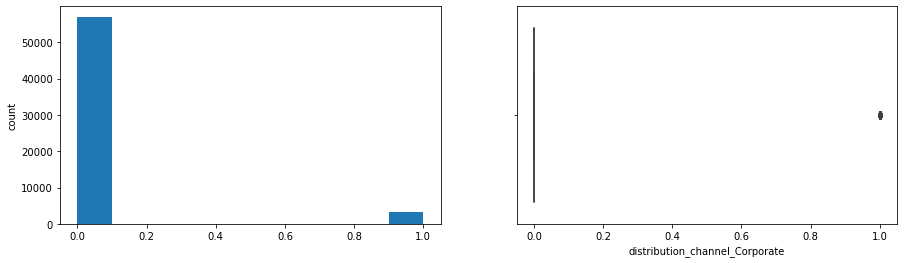

distribution_channel_Direct
Skew : 2.25


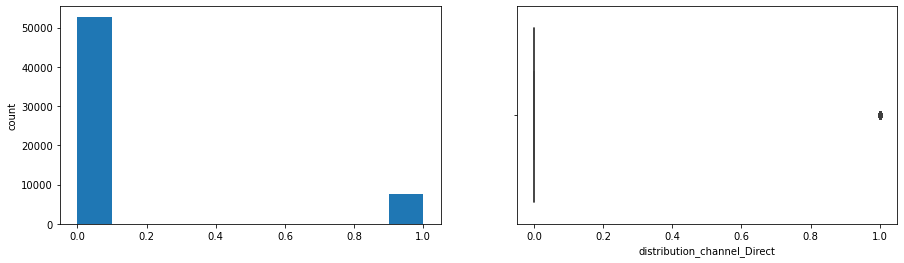

distribution_channel_GDS
Skew : 19.73


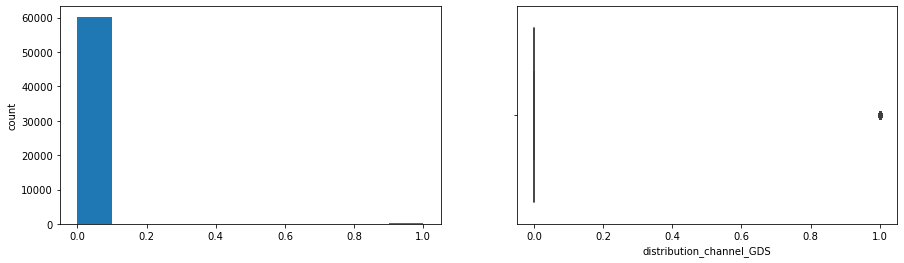

distribution_channel_TA/TO
Skew : -1.63


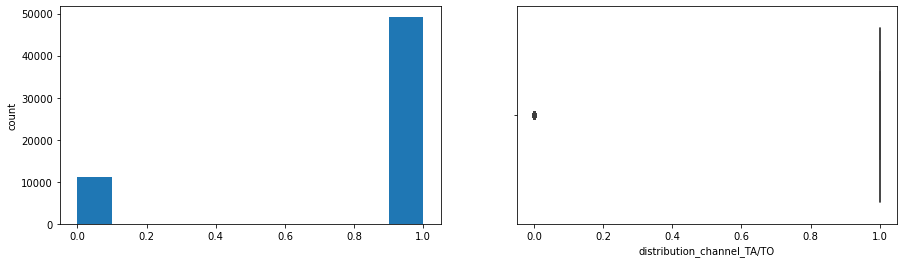

distribution_channel_Undefined
Skew : 0


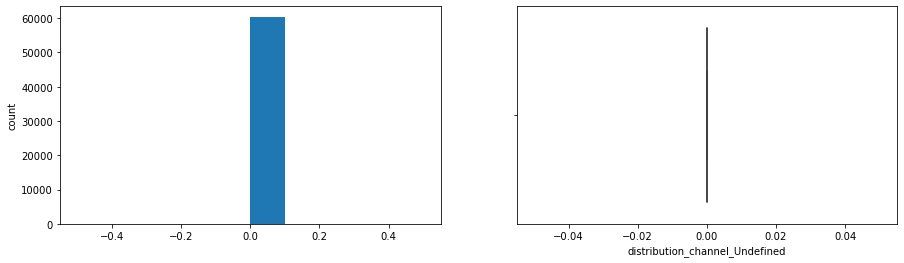

reserved_room_type_A
Skew : -0.78


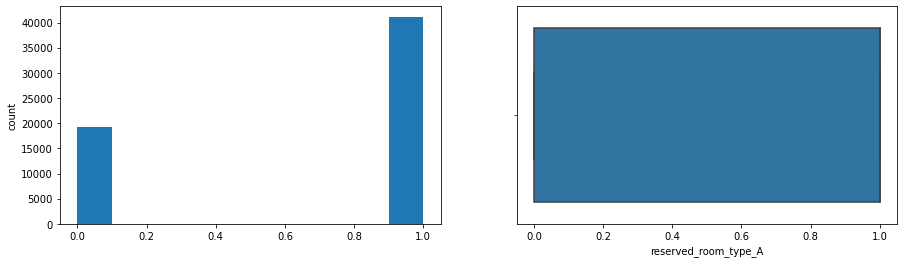

reserved_room_type_B
Skew : 12.31


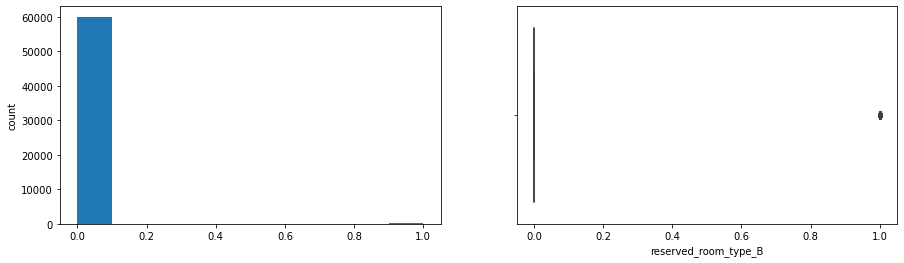

reserved_room_type_C
Skew : 10.09


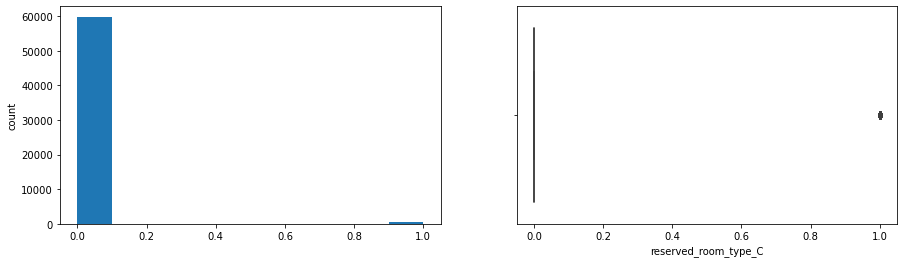

reserved_room_type_D
Skew : 1.63


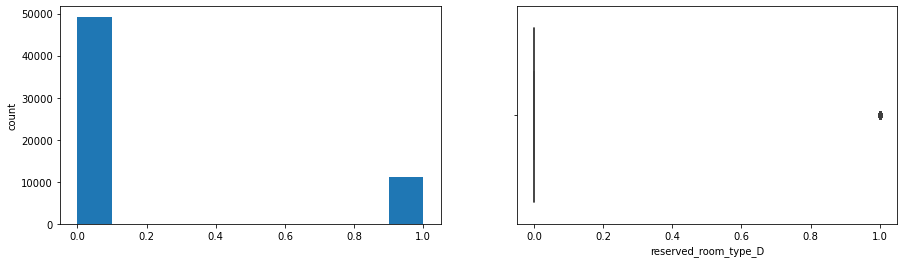

reserved_room_type_E
Skew : 3.55


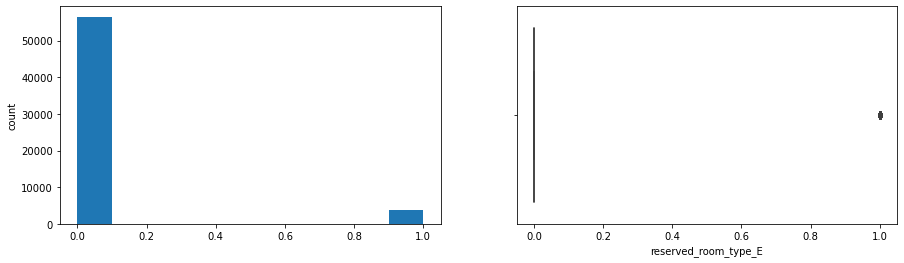

reserved_room_type_F
Skew : 5.71


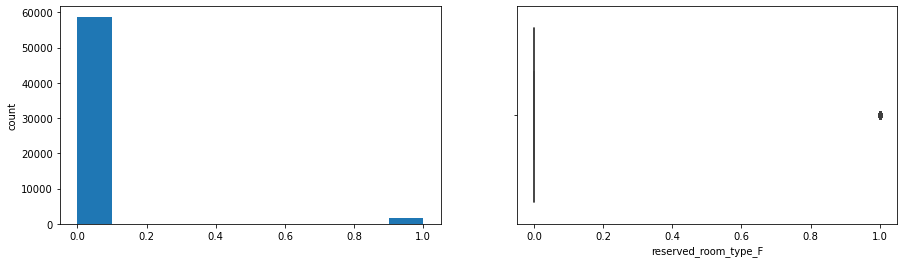

reserved_room_type_G
Skew : 6.82


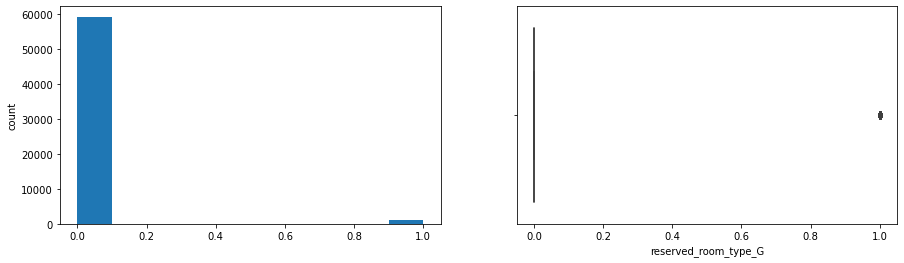

reserved_room_type_H
Skew : 13.42


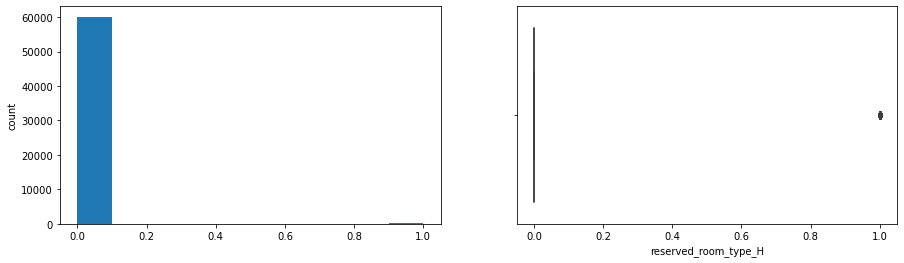

reserved_room_type_L
Skew : 0


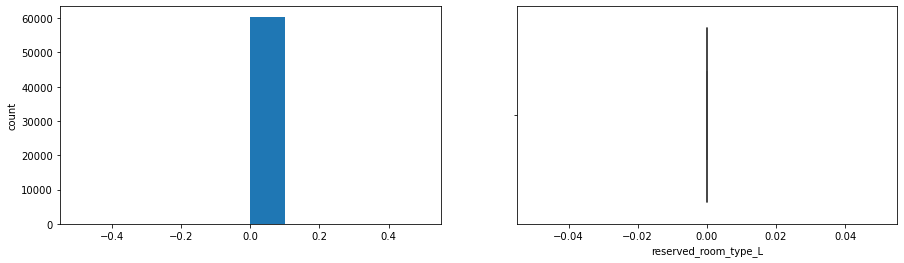

reserved_room_type_P
Skew : 74.09


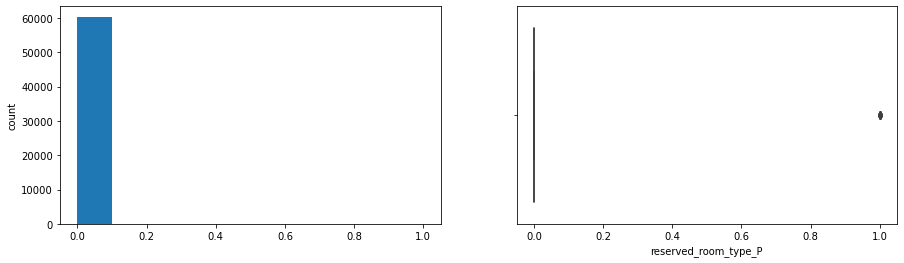

deposit_type_No Deposit
Skew : -3.21


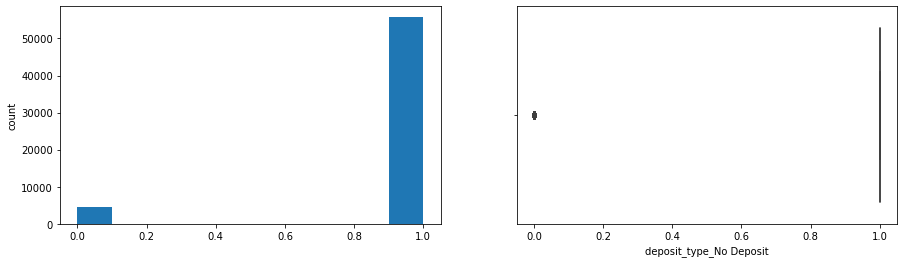

deposit_type_Non Refund
Skew : 3.23


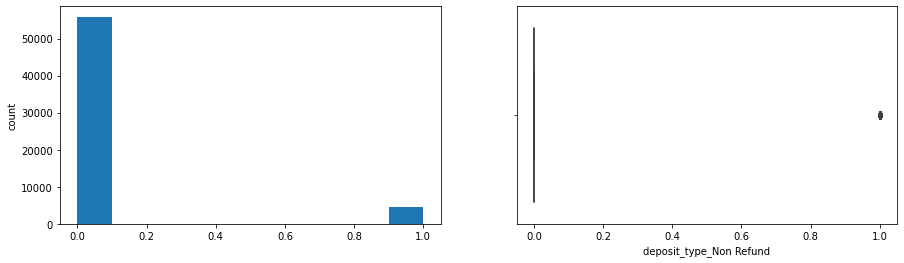

deposit_type_Refundable
Skew : 35.81


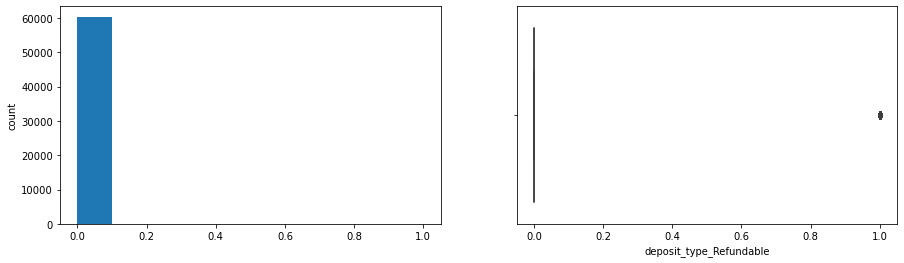

customer_type_Contract
Skew : 8.15


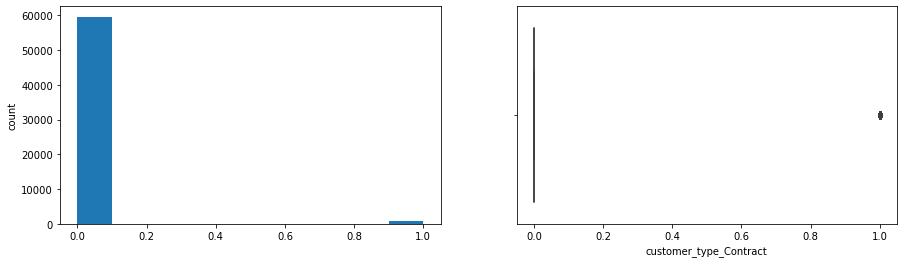

customer_type_Group
Skew : 14.18


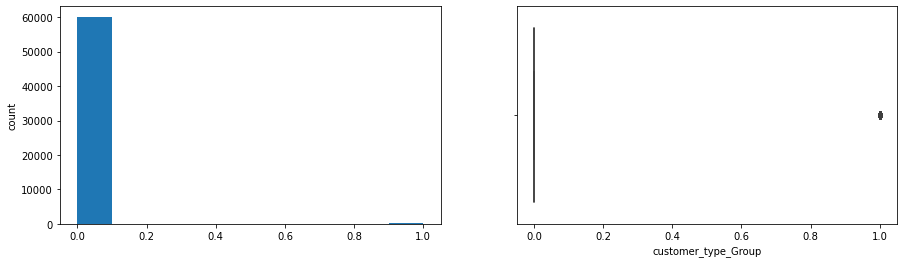

customer_type_Transient
Skew : -1.61


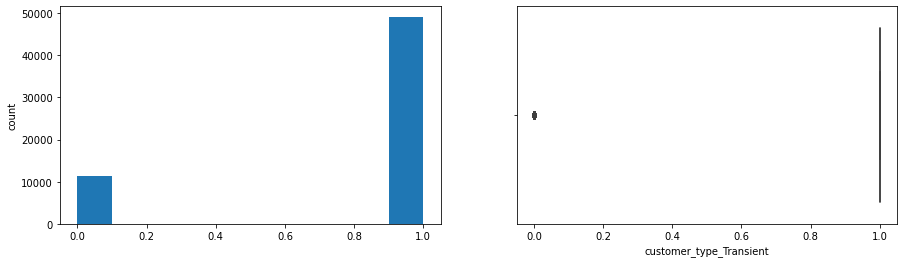

customer_type_Transient-Party
Skew : 1.79


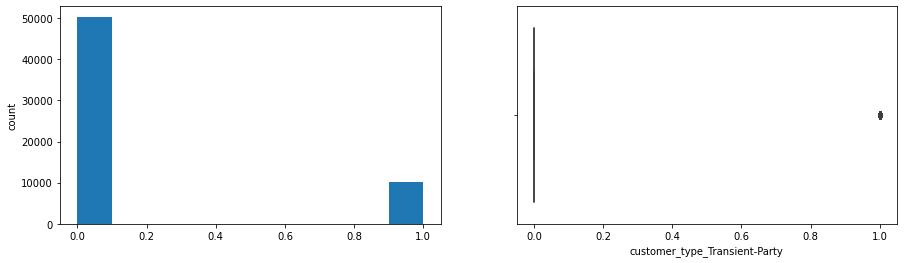

reservation_status_Canceled
Skew : 0.7


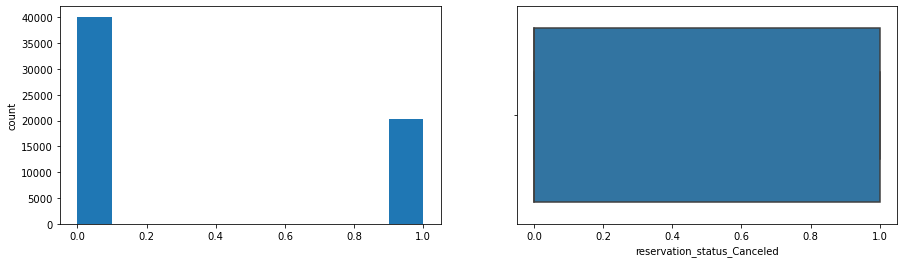

reservation_status_Check-Out
Skew : -0.65


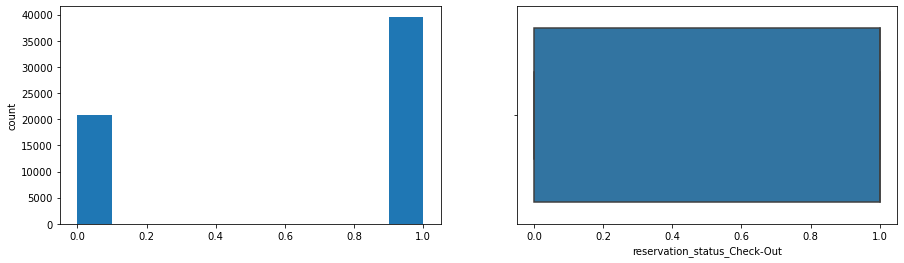

reservation_status_No-Show
Skew : 10.53


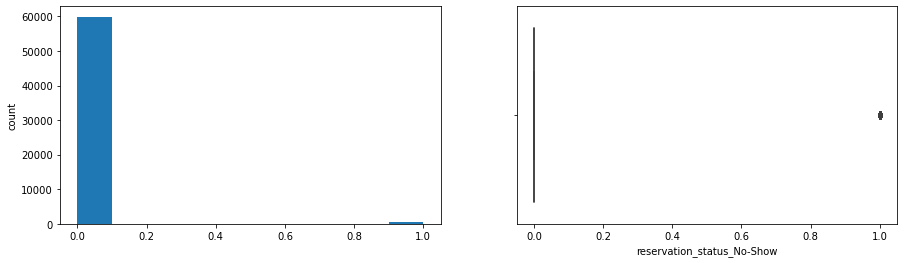

country
Skew : 0.17


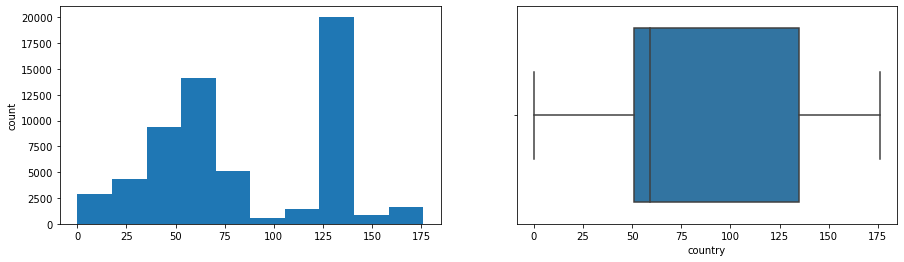

assigned_room_type
Skew : 1.08


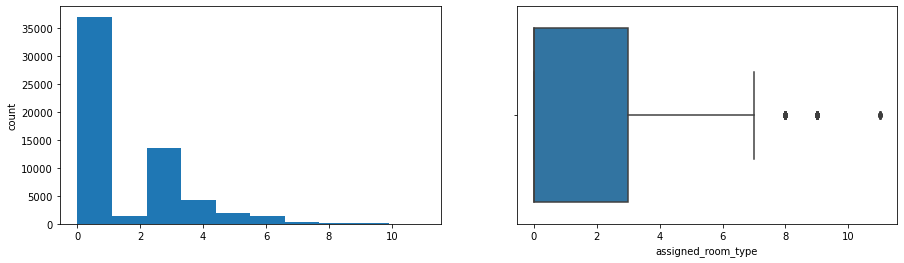

reservation_status_date
Skew : -0.0


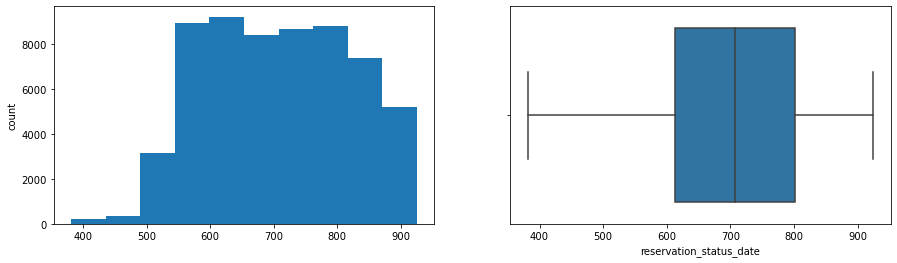

arrival_date
Skew : -0.18


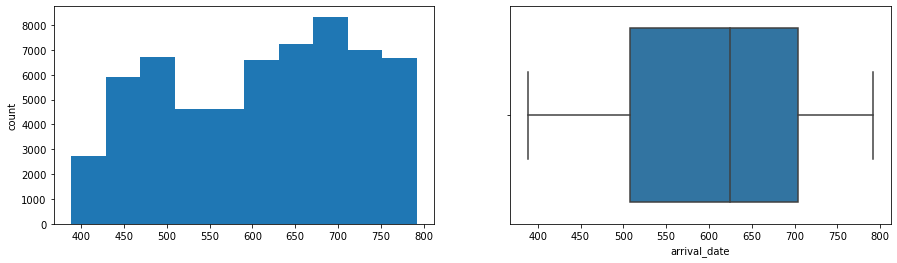

In [67]:
import seaborn as sns
for col in num_cols:
    print(col)
    print('Skew :', round(cluster_0[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    cluster_0[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cluster_0[col])
    plt.show()

#### SUMMARY FROM CLUSTER 0 AND CLUSTER 1

In [68]:
cluster_summary_numerical = df.groupby('clusters')[numerical_columns].mean()
cluster_summary_numerical

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
clusters,,,,,,,,,,,,,,,,
0,0.396920,104.753825,27.606248,0.890169,2.449811,1.844563,0.087164,0.008572,0.029241,0.163603,0.100666,0.189168,3.335186,92.776236,0.062141,0.440307
1,0.344499,103.285440,26.733860,0.964200,2.549674,1.867982,0.120239,0.007339,0.034524,0.012325,0.172722,0.252373,1.329556,110.685598,0.062886,0.699518


In [69]:
modes_per_cluster = {}
for cluster in range(2):
    cluster_data = df[df['clusters'] == cluster]
    modes_per_cluster[cluster] = cluster_data[categorical_columns].mode().iloc[0]
    
cluster_summary_categorical = pd.DataFrame(modes_per_cluster).T
cluster_summary_categorical

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,arrival_date
0,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,2015-12-05
1,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-11-25,2017-06-08


**Cluster 0 ANALYSIS:**

1. **Booking Behavior:**
   - **Cancellation Rate:** 39.69%
     - Moderately high cancellation rate, indicating some uncertainty or flexibility in plans.
   - **Lead Time:** 104.75 days
     - Bookings made well in advance, suggesting planned and potentially leisure-oriented trips.
   - **Arrival Flexibility:** Bookings spread across different weeks (27.61)
     - Guests are flexible with arrival dates.

2. **Stay Preferences:**
   - **Shorter Stays:** Weeknights (2.45), Weekends (0.89)
     - Preference for shorter stays, possibly business-oriented.
   - **Guest Composition:** Primarily adults (1.84), few children (0.09)
     - Likely single or couple travelers, with fewer families.

3. **Booking History:**
   - **Previous Cancellations:** 16.36%
     - Mixed history with cancellations, suggesting varying experiences.
   - **Mixed Bookings (Previous cancellations and successful bookings):** 10.07%
     - Varied booking experiences.

4. **Flexibility and Changes:**
   - **Booking Changes:** 18.91%
     - Moderate flexibility in plans.
   - **Waiting List Duration:** 3.34 days
     - Occasionally willing to wait for preferred arrangements.

5. **Financial Considerations:**
   - **Average Daily Rate (ADR):** $92.78
     - Moderate budget for accommodation.
   - **Parking Spaces:** 6.21%
     - Limited need for parking.
   - **Special Requests:** Moderate (0.44)
     - Occasional preferences for additional services.

**Cluster 1 ANALYSIS:**

1. **Booking Behavior:**
   - **Cancellation Rate:** 34.45%
     - Lower cancellation rate compared to Cluster 0, suggesting more confident bookings.
   - **Lead Time:** 103.29 days
     - Similar lead time to Cluster 0, indicating planned and potentially leisure-oriented trips.
   - **Arrival Flexibility:** Bookings spread across different weeks (26.73)
     - Guests are flexible with arrival dates.

2. **Stay Preferences:**
   - **Shorter Stays:** Weeknights (2.55), Weekends (0.96)
     - Similar to Cluster 0, with a preference for shorter stays.
   - **Guest Composition:** Primarily adults (1.87), slightly more children (0.12)
     - Balanced mix of single or couple travelers with slightly more families.

3. **Booking History:**
   - **Previous Cancellations:** 1.23%
     - Lower rate of cancellations, suggesting more confidence in bookings.
   - **Mixed Bookings (Previous cancellations and successful bookings):** 17.27%
     - Varied booking experiences.

4. **Flexibility and Changes:**
   - **Booking Changes:** 25.24%
     - Higher rate of changes compared to Cluster 0, indicating more flexibility.
   - **Waiting List Duration:** 1.33 days
     - Shorter waiting time for preferred arrangements.

5. **Financial Considerations:**
   - **Average Daily Rate (ADR):** $110.69
     - Slightly higher budget compared to Cluster 0.
   - **Parking Spaces:** 6.29%
     - Limited need for parking.
   - **Special Requests:** Higher (0.70)
     - More varied preferences for additional services.

## CONCLUSION

Although there are similarities between the clusters, key distinctions emerge in their confidence in bookings, waiting times, and the variety of special preferences. These differences highlight the unique traits that define each cluster.

Therefore, we can cluster this hotel booking demand dataset into two customer segments:

- **The Planned Customer:** Moderately planned, budget-conscious travelers with a mix of business and leisure focus. They show moderate flexibility, prefer shorter stays during the week, and occasionally make special requests.

- **The Flexible Customer:** Well-planned, slightly higher-budget travelers with a balanced mix of business and leisure focus. They exhibit more flexibility, have a similar preference for shorter stays, and display a higher level of confidence in bookings, along with more varied special requests.

Based on the customer segmentation, here are some **strategies** for both hotels to improve their revenue management, customer satisfaction, and operational efficiency:

**THE PLANNED CUSTOMER**

1. **Advance Booking Promotions:**
   - Offer discounts or exclusive promotions for guests who book well in advance to encourage early reservations.

2. **Flexible Cancellation Policies:**
   - Implement flexible cancellation policies to accommodate their moderate cancellation rates and provide a sense of security.

3. **Business Traveler Packages:**
   - Introduce special packages catering to business travelers, considering their shorter stays during the week and potential business-oriented preferences.

4. **Customized Loyalty Programs:**
   - Develop personalized loyalty programs to reward their mixed booking history and encourage repeat visits.

**THE FLEXIBLE CUSTOMER**

1. **Last-Minute Deals:**
   - Introduce last-minute deals or promotions to attract guests who book closer to their arrival dates, taking advantage of their lower cancellation rates.

2. **Diverse Special Requests:**
   - Offer a wide range of services and amenities to meet the varied special preferences of this cluster, enhancing their overall satisfaction.

3. **Dynamic Pricing Strategies:**
   - Implement dynamic pricing strategies that consider their flexibility and higher rate of changes, optimizing room rates based on demand fluctuations.

4. **Efficient Check-In/Out Processes:**
   - Streamline check-in and check-out processes to cater to their preference for shorter stays, improving operational efficiency and guest satisfaction.

**BOTH CUSTOMER SEGMENTS:**

1. **Data-Driven Decision-Making:**
   - Utilize data analytics to gain insights into booking patterns, preferences, and trends, allowing for more informed decision-making in revenue management and service offerings.

2. **Personalized Communication:**
   - Implement personalized communication strategies, such as targeted marketing emails or notifications, based on guests' booking history and preferences.

3. **Technology Integration:**
   - Invest in technology solutions that enhance the guest experience and operational efficiency, such as mobile check-in, keyless entry, and smart room controls.

4. **Staff Training:**
   - Train staff to recognize and cater to the specific needs and expectations of each cluster, ensuring a personalized and positive guest experience.

That concludes our clustering algorithm applied to the hotel booking demand dataset to unveil customer segments. Through our analysis, we hope that both hotels can enhance their revenue management, customer satisfaction, and operational efficiency.